# TFM 

## Preprocesamiento de DATOS

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns

In [32]:
pd.set_option('display.float_format', '{:.3f}'.format)


In [33]:
# Cargar el archivo "Consolidado Anual por Region.xlsx"
archivo_consolidado_anual = 'Consolidado Anual por Region.xlsx'

# Leer los datos del archivo
consolidado_anual_df = pd.read_excel(archivo_consolidado_anual)

# Mostrar las primeras filas para verificar la estructura
consolidado_anual_df.head()

,Año,Producto,NORTE,NORDESTE,NOROESTE,NORCENTRAL,CENTRAL,SUR,SUROESTE,ESTE,Total,Tipo
0,2011,PLATANO,29168.000,20431.000,21291.000,58065.000,27444.000,25692.000,18619.000,7957.000,208667.000,1
1,2011,PLATANO,155863.361,159980.333,18485.917,212997.250,24547.000,105884.500,23448.472,2920.917,704127.750,2
2,2011,PLATANO,454851.000,287479.000,153982.000,384182.000,109106.000,355841.000,90986.000,44909.000,1881336.000,3
3,2012,PLATANO,27059.000,25306.000,24307.000,53750.000,33144.000,26640.000,24488.000,10683.000,225377.000,1
4,2012,PLATANO,166048.667,174592.167,23814.500,216550.083,15897.167,92680.083,23739.167,3916.500,717238.333,2


In [34]:
# Asegurarse de que los nombres de las columnas se encuentran en minúsculas para aplicar el mapeo
consolidado_anual_df.columns = consolidado_anual_df.columns.str.lower()

# Diccionario para mapear abreviaturas a nombres completos
mapeo_columnas_anual = {
    'año': 'año',
    'producto': 'producto',
    'norte': 'norte',
    'nordeste': 'nordeste',
    'noroeste': 'noroeste',
    'norcentral': 'norcentral',
    'central': 'central',
    'sur': 'sur',
    'suroeste': 'suroeste',
    'este': 'este',
    'total': 'total',
    'tipo': 'tipo'
}

# Aplicar el mapeo para renombrar columnas
consolidado_anual_df.rename(columns=mapeo_columnas_anual, inplace=True)

# Verificar que los nombres de las columnas se han actualizado correctamente

consolidado_anual_df.head()

,año,producto,norte,nordeste,noroeste,norcentral,central,sur,suroeste,este,total,tipo
0,2011,PLATANO,29168.000,20431.000,21291.000,58065.000,27444.000,25692.000,18619.000,7957.000,208667.000,1
1,2011,PLATANO,155863.361,159980.333,18485.917,212997.250,24547.000,105884.500,23448.472,2920.917,704127.750,2
2,2011,PLATANO,454851.000,287479.000,153982.000,384182.000,109106.000,355841.000,90986.000,44909.000,1881336.000,3
3,2012,PLATANO,27059.000,25306.000,24307.000,53750.000,33144.000,26640.000,24488.000,10683.000,225377.000,1
4,2012,PLATANO,166048.667,174592.167,23814.500,216550.083,15897.167,92680.083,23739.167,3916.500,717238.333,2


In [112]:
# Asumimos que el archivo está correctamente cargado y contiene una columna 'tipo'
# donde 1 = siembra, 2 = cosecha, 3 = producción

# Dividir los datos en tres DataFrames basados en el valor de la columna 'tipo'
df_siembra_region = consolidado_anual_df[consolidado_anual_df['tipo'] == 1]
df_cosecha_region = consolidado_anual_df[consolidado_anual_df['tipo'] == 2]
df_produccion_region = consolidado_anual_df[consolidado_anual_df['tipo'] == 3]


In [113]:
#Cargar archivos de S,C y P mensual 

In [118]:
SCP_mensual = pd.read_excel('S,C y P MENSUAL .xlsb', engine='pyxlsb')
SCP_mensual.head(9)

,PRODUCTO,ENERO,FEBRERO,MARZO,ABRIL,MAYO,JUNIO,JULIO,AGOSTO,SEPT.,OCTUBRE,NOV.,DIC.,Total,Año,Tipo
0,PLATANO,17893.000,14036.000,10798.000,11614.000,18253.000,17554.000,18852.000,13166.000,18498.000,15580.000,37013.000,15410.000,208667.000,2011,1
1,PLATANO,673917.000,690886.000,672241.000,678409.000,698357.000,725877.000,730121.000,742675.000,723181.000,701047.000,718248.000,694574.000,8449533.000,2011,2
2,PLATANO,110083.000,143400.000,141162.000,129111.000,141034.000,172800.000,177158.000,190457.000,167571.000,132043.000,125470.000,251047.000,1881336.000,2011,3
3,PLATANO,18115.000,14837.000,17221.000,14142.000,19740.000,17597.000,16334.000,10584.000,19640.000,13843.000,38742.000,24582.000,225377.000,2012,1
4,PLATANO,693877.000,715357.000,720124.000,722410.000,717546.000,738508.000,755478.000,765399.000,723294.000,630117.000,737599.000,687151.000,8606860.000,2012,2
5,PLATANO,127965.000,144868.000,143747.000,185808.000,144741.000,173731.000,178779.000,218755.000,178324.000,157706.000,127178.000,249100.000,2030702.000,2012,3
6,PLATANO,18430.000,20834.000,10725.000,15092.000,19902.000,17650.000,16684.000,11862.000,37706.000,14692.000,39369.000,26547.000,249493.000,2013,1
7,PLATANO,694120.000,721041.000,710732.000,722902.000,725984.000,743075.000,755524.000,775538.000,724032.000,652483.000,743356.000,696448.000,8665235.000,2013,2
8,PLATANO,125567.000,144874.000,144329.000,307366.000,155508.000,174229.000,198219.000,235605.000,186407.000,164569.000,133718.000,253874.000,2224265.000,2013,3


In [115]:
# Asegurarse de que los nombres de las columnas se encuentran en minúsculas para aplicar el mapeo
SCP_mensual.columns = SCP_mensual.columns.str.lower()

# Diccionario para mapear abreviaturas a nombres completos
mapeo_columnas = {
    'producto': 'producto',
    'enero': 'enero',
    'febrero': 'febrero',
    'marzo': 'marzo',
    'abril': 'abril',
    'mayo': 'mayo',
    'junio': 'junio',
    'julio': 'julio',
    'agosto': 'agosto',
    'sept.': 'septiembre',
    'octubre': 'octubre',
    'nov.': 'noviembre',
    'dic.': 'diciembre',
    'total': 'total',
    'año': 'año',
    'tipo': 'tipo'
}

# Aplicar el mapeo para renombrar columnas
SCP_mensual.rename(columns=mapeo_columnas, inplace=True)

# Verificar que los nombres de las columnas se han actualizado correctamente
print(SCP_mensual.columns)


Index(['producto', 'enero', 'febrero', 'marzo', 'abril', 'mayo', 'junio',
       'julio', 'agosto', 'septiembre', 'octubre', 'noviembre', 'diciembre',
       'total', 'año', 'tipo'],
      dtype='object')


In [116]:
#Redondear numeros

# Redondear los valores del DataFrame consolidado_anual_df a 3 decimales
consolidado_anual_df = consolidado_anual_df.round(3)

# Redondear los valores del DataFrame SCP_mensual a 3 decimales
SCP_mensual = SCP_mensual.round(3)


In [40]:
# Dividir los datos en tres DataFrames basados en el valor de la columna 'tipo'
df_siembra_mensual = SCP_mensual[SCP_mensual['tipo'] == 1]
df_cosecha_mensual = SCP_mensual[SCP_mensual['tipo'] == 2]
df_produccion_mensual = SCP_mensual[SCP_mensual['tipo'] == 3]


In [41]:
# Filtrar por año entre 2011 y 2022
df_siembra_region = df_siembra_region[(df_siembra_region['año'] >= 2011) & (df_siembra_region['año'] <= 2022)]
df_cosecha_region = df_cosecha_region[(df_cosecha_region['año'] >= 2011) & (df_cosecha_region['año'] <= 2022)]
df_produccion_region = df_produccion_region[(df_produccion_region['año'] >= 2011) & (df_produccion_region['año'] <= 2022)]

df_siembra_mensual = df_siembra_mensual[(df_siembra_mensual['año'] >= 2011) & (df_siembra_mensual['año'] <= 2022)]
df_cosecha_mensual = df_cosecha_mensual[(df_cosecha_mensual['año'] >= 2011) & (df_cosecha_mensual['año'] <= 2022)]
df_produccion_mensual = df_produccion_mensual[(df_produccion_mensual['año'] >= 2011) & (df_produccion_mensual['año'] <= 2022)]

#### Calculamos el total de los dos grupos (Mensual y regiones) y vemos sus diferencias (tienen que dar igual)

In [43]:
# Calcular el total anual para los datos mensuales sumando las columnas de los meses
df_siembra_mensual['total_mensual'] = df_siembra_mensual[['enero', 'febrero', 'marzo', 'abril', 'mayo', 'junio', 'julio', 'agosto', 'septiembre', 'octubre', 'noviembre', 'diciembre']].sum(axis=1)
df_cosecha_mensual['total_mensual'] = df_cosecha_mensual[['enero', 'febrero', 'marzo', 'abril', 'mayo', 'junio', 'julio', 'agosto', 'septiembre', 'octubre', 'noviembre', 'diciembre']].sum(axis=1)
df_produccion_mensual['total_mensual'] = df_produccion_mensual[['enero', 'febrero', 'marzo', 'abril', 'mayo', 'junio', 'julio', 'agosto', 'septiembre', 'octubre', 'noviembre', 'diciembre']].sum(axis=1)

# Calcular el total anual para los datos regionales sumando las columnas de las regiones
df_siembra_region['total_regional'] = df_siembra_region[['norte', 'nordeste', 'noroeste', 'norcentral', 'central', 'sur', 'suroeste', 'este']].sum(axis=1)
df_cosecha_region['total_regional'] = df_cosecha_region[['norte', 'nordeste', 'noroeste', 'norcentral', 'central', 'sur', 'suroeste', 'este']].sum(axis=1)
df_produccion_region['total_regional'] = df_produccion_region[['norte', 'nordeste', 'noroeste', 'norcentral', 'central', 'sur', 'suroeste', 'este']].sum(axis=1)

# Crear un DataFrame de comparación
comparacion = pd.DataFrame({
    'año': df_siembra_region['año'],
    'siembra_mensual': df_siembra_mensual['total_mensual'].values,
    'siembra_regional': df_siembra_region['total_regional'].values,
    'cosecha_mensual': df_cosecha_mensual['total_mensual'].values,
    'cosecha_regional': df_cosecha_region['total_regional'].values,
    'produccion_mensual': df_produccion_mensual['total_mensual'].values,
    'produccion_regional': df_produccion_region['total_regional'].values
})

# Mostrar el DataFrame de comparación
print(comparacion)


     año  siembra_mensual  siembra_regional  cosecha_mensual  \
0   2011       208667.000        208667.000      8449533.000   
3   2012       225377.000        225377.000      8606860.000   
6   2013       249493.000        249493.000      8665235.000   
9   2014       255482.000        255482.000      8823385.000   
12  2015       260364.000        260364.000      8719763.000   
15  2016       236565.000        236565.000      8942497.000   
18  2017       245431.000        245431.000      9073564.000   
21  2018       274130.000        274130.000      9225509.000   
24  2019       280304.000        280304.000      9344882.000   
27  2020       315988.000        315988.000      8609515.155   
30  2021       325719.000        325719.000      9237864.000   
33  2022       441646.000        441646.000     10360286.767   

    cosecha_regional  produccion_mensual  produccion_regional  
0         704127.750         1881336.000          1881336.000  
3         717238.333         2030702.00

In [44]:
# Calcular las diferencias entre los totales mensuales y regionales
comparacion['dif_siembra'] = comparacion['siembra_mensual'] - comparacion['siembra_regional']
comparacion['dif_cosecha'] = comparacion['cosecha_mensual'] - comparacion['cosecha_regional']
comparacion['dif_produccion'] = comparacion['produccion_mensual'] - comparacion['produccion_regional']

# Mostrar el DataFrame de comparación con las diferencias
# Seleccionar las columnas de interés: año y diferencia de siembra
diferencias_cosecha = comparacion[['año', 'dif_cosecha']]

comparacion






,año,siembra_mensual,siembra_regional,cosecha_mensual,cosecha_regional,produccion_mensual,produccion_regional,dif_siembra,dif_cosecha,dif_produccion
0,2011,208667.000,208667.000,8449533.000,704127.750,1881336.000,1881336.000,0.000,7745405.250,0.000
3,2012,225377.000,225377.000,8606860.000,717238.333,2030702.000,2030702.000,0.000,7889621.667,0.000
6,2013,249493.000,249493.000,8665235.000,722102.917,2224265.000,2224265.000,0.000,7943132.083,0.000
9,2014,255482.000,255482.000,8823385.000,735282.083,2467341.000,2467341.000,0.000,8088102.917,0.000
12,2015,260364.000,260364.000,8719763.000,726646.917,2105078.205,2105078.203,0.000,7993116.083,0.002
15,2016,236565.000,236565.000,8942497.000,745208.083,2333592.025,2333592.025,0.000,8197288.917,0.000
18,2017,245431.000,245431.000,9073564.000,756130.333,2467705.327,2467705.327,0.000,8317433.667,-0.000
21,2018,274130.000,274130.000,9225509.000,768792.417,2493593.989,2493593.989,0.000,8456716.583,0.000
24,2019,280304.000,280304.000,9344882.000,778740.167,2516895.660,2516895.660,0.000,8566141.833,0.000
27,2020,315988.000,315988.000,8609515.155,717257.997,2829607.866,2829607.866,0.000,7892257.158,-0.000


#### Vemos anomalias en la columna dif_cosecha

In [121]:

# Mostrar el resultado
diferencias_cosecha


,año,dif_cosecha
0,2011,7745405.250
3,2012,7889621.667
6,2013,7943132.083
9,2014,8088102.917
12,2015,7993116.083
15,2016,8197288.917
18,2017,8317433.667
21,2018,8456716.583
24,2019,8566141.833
27,2020,7892257.158


#### Investigando anomalias en el Excel de donde vienen los datos, vi que estos datos estan dados por el valor del area de cosecha entre 12 (cosecha_valor/12)
- Multiplicaremos estos valores por 12

In [46]:
# Crear una copia del DataFrame original para realizar los cálculos y mantener los datos originales
df_cosecha_region_ajustado = df_cosecha_region.copy()

# Definir las columnas de regiones
columnas_regiones = ['norte', 'nordeste', 'noroeste', 'norcentral', 'central', 'sur', 'suroeste', 'este']

# Seleccionar los años 2011-2020 para el ajuste
mask_region = df_cosecha_region_ajustado['año'].between(2011, 2020)

# Multiplicar los valores de las columnas de interés por 12 para los años 2011-2020
df_cosecha_region_ajustado.loc[mask_region, columnas_regiones] *= 12

# Calcular el nuevo total para cada fila en el rango de años después de la multiplicación
df_cosecha_region_ajustado['total'] = df_cosecha_region_ajustado[columnas_regiones].sum(axis=1)

# Renombrar la columna 'total_regional' a 'total' para que sea consistente
df_cosecha_region_ajustado.rename(columns={'total_regional': 'total'}, inplace=True)

# Verificar los resultados finales con todos los años
df_cosecha_region_final = df_cosecha_region_ajustado.copy()

# Eliminar la columna 'total' ya que se recalculará en otra celda
df_cosecha_region_final.drop(columns=['total'], inplace=True)

# Mostrar el DataFrame sin la columna 'total'
df_cosecha_region_final


,año,producto,norte,nordeste,noroeste,norcentral,central,sur,suroeste,este,tipo
1,2011,PLATANO,1870360.333,1919764.000,221831.000,2555967.000,294564.000,1270614.000,281381.667,35051.000,2
4,2012,PLATANO,1992584.000,2095106.000,285774.000,2598601.000,190766.000,1112161.000,284870.000,46998.000,2
7,2013,PLATANO,2435503.000,1898102.000,505575.000,2064657.000,259306.000,1037129.000,370531.000,94432.000,2
10,2014,PLATANO,2442564.330,1934072.797,472579.870,2100212.667,251972.089,1222426.507,290382.145,109174.593,2
13,2015,PLATANO,3064432.295,1206335.517,220850.000,2901881.477,166066.816,802828.411,312484.963,44883.521,2
16,2016,PLATANO,501730.823,1582284.506,330181.773,5193275.225,214119.889,439512.143,580208.554,101184.086,2
19,2017,PLATANO,523060.264,1532083.968,272292.698,5428929.728,238180.847,380772.010,599202.893,99041.591,2
22,2018,PLATANO,1464595.583,1966424.597,236059.182,3832266.412,268195.087,657544.567,644597.616,155825.956,2
25,2019,PLATANO,1012754.054,1702492.548,262853.796,4335424.054,390179.738,684659.937,770470.143,186047.730,2
28,2020,PLATANO,432240.000,949152.000,670711.137,4919743.000,365051.052,818643.547,306308.186,145247.043,2


In [47]:
# Eliminar la columna 'total' si ya existe para evitar duplicados
if 'total' in df_cosecha_region_ajustado.columns:
    df_cosecha_region_ajustado.drop(columns=['total'], inplace=True)

# Asegurarse de que el cálculo del total sea correcto, sumando todas las regiones
df_cosecha_region_ajustado['total_regional'] = df_cosecha_region_ajustado[columnas_regiones].sum(axis=1)

# Mostrar el DataFrame final con el cálculo correcto del total
df_cosecha_region_final = df_cosecha_region_ajustado.copy()
df_cosecha_region_final


,año,producto,norte,nordeste,noroeste,norcentral,central,sur,suroeste,este,tipo,total_regional
1,2011,PLATANO,1870360.333,1919764.000,221831.000,2555967.000,294564.000,1270614.000,281381.667,35051.000,2,8449533.000
4,2012,PLATANO,1992584.000,2095106.000,285774.000,2598601.000,190766.000,1112161.000,284870.000,46998.000,2,8606860.000
7,2013,PLATANO,2435503.000,1898102.000,505575.000,2064657.000,259306.000,1037129.000,370531.000,94432.000,2,8665235.000
10,2014,PLATANO,2442564.330,1934072.797,472579.870,2100212.667,251972.089,1222426.507,290382.145,109174.593,2,8823385.000
13,2015,PLATANO,3064432.295,1206335.517,220850.000,2901881.477,166066.816,802828.411,312484.963,44883.521,2,8719763.000
16,2016,PLATANO,501730.823,1582284.506,330181.773,5193275.225,214119.889,439512.143,580208.554,101184.086,2,8942497.000
19,2017,PLATANO,523060.264,1532083.968,272292.698,5428929.728,238180.847,380772.010,599202.893,99041.591,2,9073564.000
22,2018,PLATANO,1464595.583,1966424.597,236059.182,3832266.412,268195.087,657544.567,644597.616,155825.956,2,9225509.000
25,2019,PLATANO,1012754.054,1702492.548,262853.796,4335424.054,390179.738,684659.937,770470.143,186047.730,2,9344882.000
28,2020,PLATANO,432240.000,949152.000,670711.137,4919743.000,365051.052,818643.547,306308.186,145247.043,2,8607095.964


#### Calculamos de nuevo la diferencia pero solo para la parte de la cosecha

In [48]:
# Calcular el total mensual para los datos de cosecha en df_cosecha_mensual
df_cosecha_mensual['total_mensual'] = df_cosecha_mensual[['enero', 'febrero', 'marzo', 'abril', 'mayo', 'junio', 'julio', 'agosto', 'septiembre', 'octubre', 'noviembre', 'diciembre']].sum(axis=1)

# Supongamos que los datos de df_cosecha_region_final ya están actualizados con el total correcto.
# Ahora vamos a comparar total_mensual de df_cosecha_mensual con total_regional de df_cosecha_region_final

# Asegurarse de que los DataFrames están alineados por año
df_cosecha_region_final = df_cosecha_region_final.sort_values(by='año').reset_index(drop=True)
df_cosecha_mensual = df_cosecha_mensual.sort_values(by='año').reset_index(drop=True)

# Crear el DataFrame de comparación
comparacion_cosecha = pd.DataFrame({
    'año': df_cosecha_mensual['año'],  # Usar la columna de años de df_cosecha_mensual
    'cosecha_mensual': df_cosecha_mensual['total_mensual'],
    'cosecha_regional': df_cosecha_region_final['total_regional']
})

# Calcular la diferencia entre los totales mensuales y regionales
comparacion_cosecha['diferencia'] = comparacion_cosecha['cosecha_mensual'] - comparacion_cosecha['cosecha_regional']

# Mostrar el DataFrame de comparación con las diferencias
comparacion_cosecha




,año,cosecha_mensual,cosecha_regional,diferencia
0,2011,8449533.000,8449533.000,0.000
1,2012,8606860.000,8606860.000,0.000
2,2013,8665235.000,8665235.000,0.000
3,2014,8823385.000,8823385.000,0.000
4,2015,8719763.000,8719763.000,-0.000
5,2016,8942497.000,8942497.000,0.000
6,2017,9073564.000,9073564.000,0.000
7,2018,9225509.000,9225509.000,0.000
8,2019,9344882.000,9344882.000,0.000
9,2020,8609515.155,8607095.964,2419.191


#### Para el año 2020 hay una diferencia anormal, la ajustaremos asignandole proporciones a cada region dependiendo cuanto influya en el total

In [49]:


# Datos originales de las regiones para 2020 en df_cosecha_region_final
regiones = ['norte', 'nordeste', 'noroeste', 'norcentral', 'central', 'sur', 'suroeste', 'este']
valores_regionales_2020 = [4.322400e+05, 9.491520e+05, 670711.136811, 4.919743e+06, 365051.051623, 8.186435e+05, 306308.186210, 145247.042575]

# Convertir a DataFrame para facilitar el cálculo
df_regiones_2020 = pd.DataFrame({'region': regiones, 'valor': valores_regionales_2020})

# Calcular el total original para 2020
total_original_2020 = df_regiones_2020['valor'].sum()

# Diferencia total observada (dif_cosecha para 2020)
diferencia_total_2020 = 8609515 - 8607096  # Diferencia observada

# Calcular la proporción de cada región
df_regiones_2020['proporcion'] = df_regiones_2020['valor'] / total_original_2020

# Distribuir la diferencia proporcionalmente
df_regiones_2020['ajuste'] = df_regiones_2020['proporcion'] * diferencia_total_2020

# Aplicar los ajustes a los valores originales
df_regiones_2020['valor_ajustado'] = df_regiones_2020['valor'] + df_regiones_2020['ajuste']

# Mostrar el resultado
df_regiones_2020


,region,valor,proporcion,ajuste,valor_ajustado
0,norte,432240.000,0.050,121.480,432361.480
1,nordeste,949152.000,0.110,266.756,949418.756
2,noroeste,670711.137,0.078,188.501,670899.638
3,norcentral,4919743.000,0.572,1382.680,4921125.680
4,central,365051.052,0.042,102.597,365153.648
5,sur,818643.500,0.095,230.077,818873.577
6,suroeste,306308.186,0.036,86.087,306394.273
7,este,145247.043,0.017,40.821,145287.864


#### Luego de ajustar los valores del 2020 veremos otra vez la diferencia entre cosecha mensual y regional por año

In [50]:
# Actualizar los valores de 2020 en df_cosecha_region_final con los valores ajustados
for index, row in df_regiones_2020.iterrows():
    region = row['region']
    valor_ajustado = row['valor_ajustado']
    df_cosecha_region_final.loc[(df_cosecha_region_final['año'] == 2020) & (df_cosecha_region_final['producto'] == 'PLATANO'), region] = valor_ajustado

# Recalcular el total regional para el año 2020 después de los ajustes
df_cosecha_region_final['total_regional'] = df_cosecha_region_final[regiones].sum(axis=1)

# Asegurarse de que los DataFrames están alineados por año
df_cosecha_region_final = df_cosecha_region_final.sort_values(by='año').reset_index(drop=True)
df_cosecha_mensual = df_cosecha_mensual.sort_values(by='año').reset_index(drop=True)

# Crear el DataFrame de comparación específico para cosecha
comparacion_cosecha = pd.DataFrame({
    'año': df_cosecha_mensual['año'],  # Usar la columna de años de df_cosecha_mensual
    'cosecha_mensual': df_cosecha_mensual['total_mensual'],
    'cosecha_regional': df_cosecha_region_final['total_regional']
})

# Calcular la diferencia entre los totales mensuales y regionales para cosecha
comparacion_cosecha['diferencia'] = comparacion_cosecha['cosecha_mensual'] - comparacion_cosecha['cosecha_regional']

# Mostrar el DataFrame de comparación con las diferencias de cosecha
print(comparacion_cosecha)


     año  cosecha_mensual  cosecha_regional  diferencia
0   2011      8449533.000       8449533.000       0.000
1   2012      8606860.000       8606860.000       0.000
2   2013      8665235.000       8665235.000       0.000
3   2014      8823385.000       8823385.000       0.000
4   2015      8719763.000       8719763.000      -0.000
5   2016      8942497.000       8942497.000       0.000
6   2017      9073564.000       9073564.000       0.000
7   2018      9225509.000       9225509.000       0.000
8   2019      9344882.000       9344882.000       0.000
9   2020      8609515.155       8609514.917       0.238
10  2021      9237864.000       9237864.000       0.000
11  2022     10360286.767      10360286.800      -0.033


In [109]:
df_cosecha_region_final

,año,producto,norte,nordeste,noroeste,norcentral,central,sur,suroeste,este,tipo,total_regional
0,2011,PLATANO,1870360.333,1919764.000,221831.000,2555967.000,294564.000,1270614.000,281381.667,35051.000,2,8449533.000
1,2012,PLATANO,1992584.000,2095106.000,285774.000,2598601.000,190766.000,1112161.000,284870.000,46998.000,2,8606860.000
2,2013,PLATANO,2435503.000,1898102.000,505575.000,2064657.000,259306.000,1037129.000,370531.000,94432.000,2,8665235.000
3,2014,PLATANO,2442564.330,1934072.797,472579.870,2100212.667,251972.089,1222426.507,290382.145,109174.593,2,8823385.000
4,2015,PLATANO,3064432.295,1206335.517,220850.000,2901881.477,166066.816,802828.411,312484.963,44883.521,2,8719763.000
5,2016,PLATANO,501730.823,1582284.506,330181.773,5193275.225,214119.889,439512.143,580208.554,101184.086,2,8942497.000
6,2017,PLATANO,523060.264,1532083.968,272292.698,5428929.728,238180.847,380772.010,599202.893,99041.591,2,9073564.000
7,2018,PLATANO,1464595.583,1966424.597,236059.182,3832266.412,268195.087,657544.567,644597.616,155825.956,2,9225509.000
8,2019,PLATANO,1012754.054,1702492.548,262853.796,4335424.054,390179.738,684659.937,770470.143,186047.730,2,9344882.000
9,2020,PLATANO,432361.480,949418.756,670899.638,4921125.680,365153.648,818873.577,306394.273,145287.864,2,8609514.917


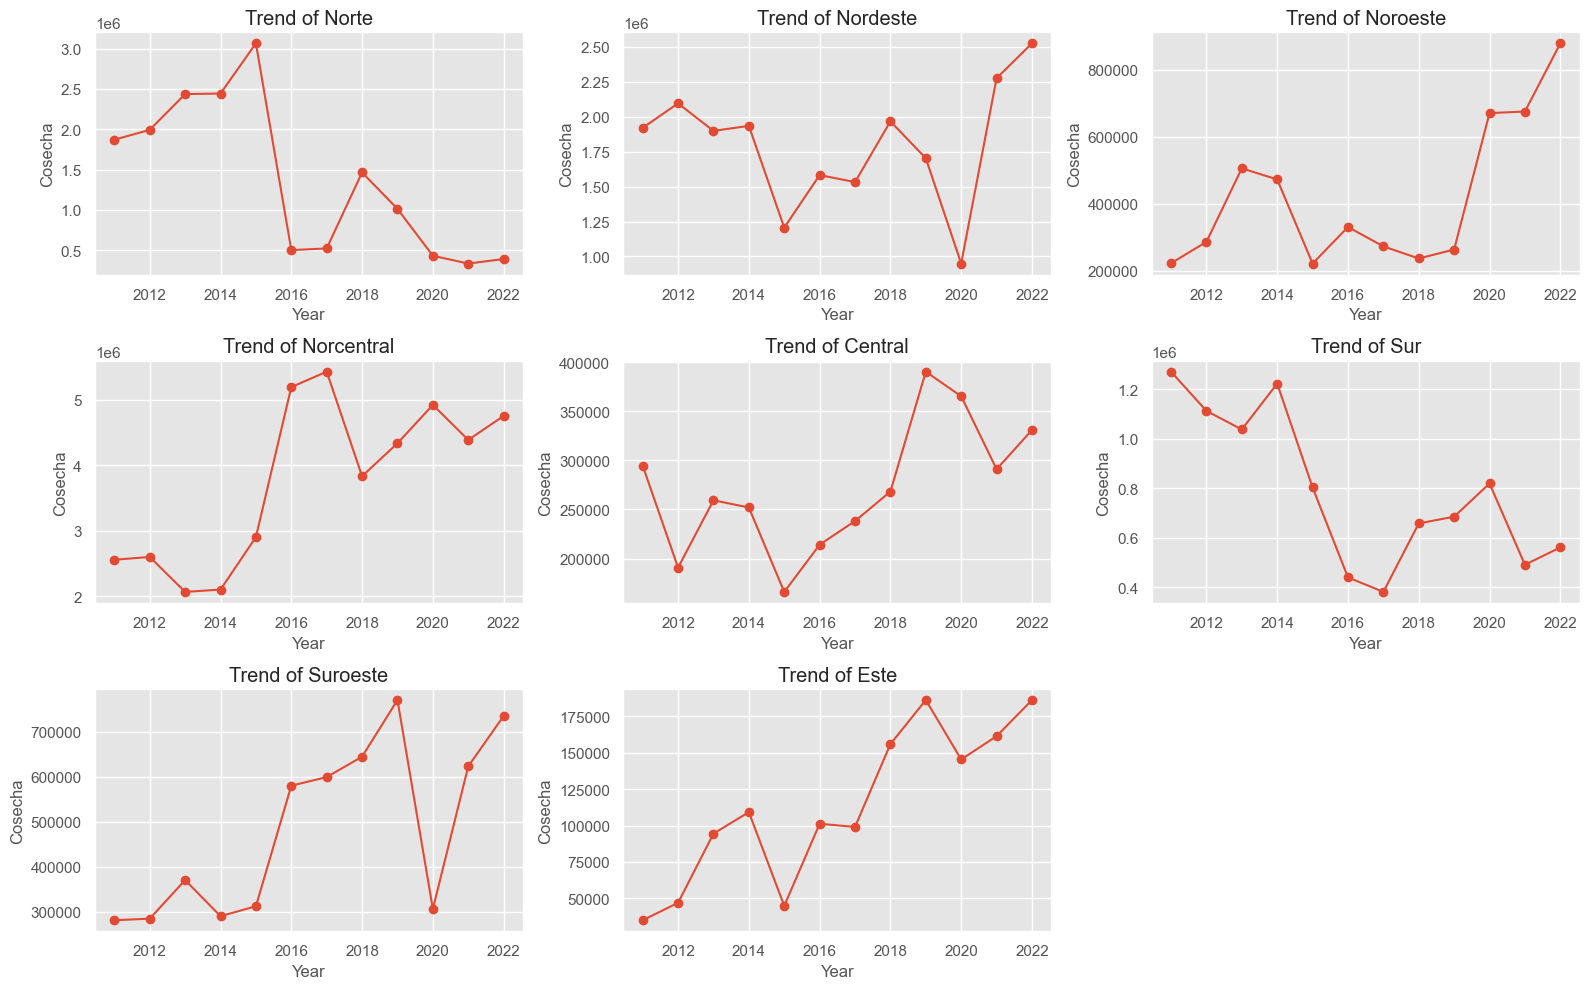

In [123]:
# Visualización de las tendencias
def plot_trends(df):
    plt.figure(figsize=(16, 10))

    regiones = ['norte', 'nordeste', 'noroeste', 'norcentral', 'central', 'sur', 'suroeste', 'este']
    for i, region in enumerate(regiones):
        plt.subplot(3, 3, i+1)
        plt.plot(df['año'], df[region], marker='o')
        plt.title(f'Trend of {region.capitalize()}')
        plt.xlabel('Year')
        plt.ylabel('Cosecha')

    plt.tight_layout()
    plt.show()

plot_trends(df_cosecha_region_final)


In [51]:
# Asegurarse de que los DataFrames están alineados por año
df_siembra_mensual = df_siembra_mensual.sort_values(by='año').reset_index(drop=True)
df_siembra_region = df_siembra_region.sort_values(by='año').reset_index(drop=True)
df_cosecha_mensual = df_cosecha_mensual.sort_values(by='año').reset_index(drop=True)
df_cosecha_region_final = df_cosecha_region_final.sort_values(by='año').reset_index(drop=True)
df_produccion_mensual = df_produccion_mensual.sort_values(by='año').reset_index(drop=True)
df_produccion_region = df_produccion_region.sort_values(by='año').reset_index(drop=True)

# Crear DataFrames de comparación para siembra, cosecha y producción
comparacion_siembra = pd.DataFrame({
    'año': df_siembra_mensual['año'],
    'siembra_mensual': df_siembra_mensual['total_mensual'],
    'siembra_regional': df_siembra_region['total_regional']
})
comparacion_siembra['dif_siembra'] = comparacion_siembra['siembra_mensual'] - comparacion_siembra['siembra_regional']

comparacion_cosecha = pd.DataFrame({
    'año': df_cosecha_mensual['año'],
    'cosecha_mensual': df_cosecha_mensual['total_mensual'],
    'cosecha_regional': df_cosecha_region_final['total_regional']
})
comparacion_cosecha['diferencia'] = comparacion_cosecha['cosecha_mensual'] - comparacion_cosecha['cosecha_regional']

comparacion_produccion = pd.DataFrame({
    'año': df_produccion_mensual['año'],
    'produccion_mensual': df_produccion_mensual['total_mensual'],
    'produccion_regional': df_produccion_region['total_regional']
})
comparacion_produccion['dif_produccion'] = comparacion_produccion['produccion_mensual'] - comparacion_produccion['produccion_regional']

# Filtrar para eliminar filas con NaN en los años
comparacion_siembra = comparacion_siembra.dropna(subset=['año'])
comparacion_cosecha = comparacion_cosecha.dropna(subset=['año'])
comparacion_produccion = comparacion_produccion.dropna(subset=['año'])

# Mostrar resultados
print("Comparación de Siembra:")
print(comparacion_siembra)

print("\nComparación de Cosecha:")
print(comparacion_cosecha)

print("\nComparación de Producción:")
print(comparacion_produccion)


Comparación de Siembra:
     año  siembra_mensual  siembra_regional  dif_siembra
0   2011       208667.000        208667.000        0.000
1   2012       225377.000        225377.000        0.000
2   2013       249493.000        249493.000        0.000
3   2014       255482.000        255482.000        0.000
4   2015       260364.000        260364.000        0.000
5   2016       236565.000        236565.000        0.000
6   2017       245431.000        245431.000        0.000
7   2018       274130.000        274130.000        0.000
8   2019       280304.000        280304.000        0.000
9   2020       315988.000        315988.000        0.000
10  2021       325719.000        325719.000       -0.000
11  2022       441646.000        441646.000        0.000

Comparación de Cosecha:
     año  cosecha_mensual  cosecha_regional  diferencia
0   2011      8449533.000       8449533.000       0.000
1   2012      8606860.000       8606860.000       0.000
2   2013      8665235.000       8665235.00

- Ya no existen diferencia remarcbales entre los totales!

### Visualizaciones

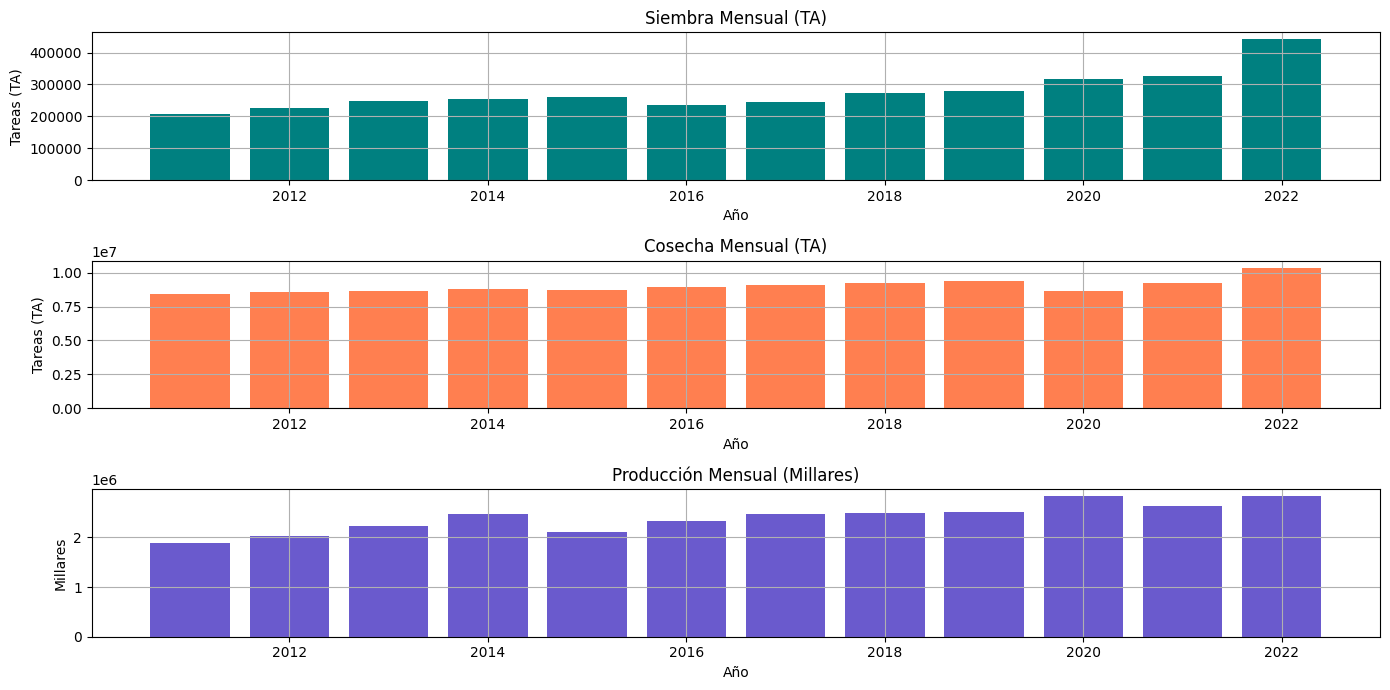

In [52]:
import matplotlib.pyplot as plt

# Configuración del tamaño de las figuras
plt.figure(figsize=(14, 7))

# Gráfico de Barras para Siembra Mensual (TA)
plt.subplot(3, 1, 1)
plt.bar(comparacion_siembra['año'], comparacion_siembra['siembra_mensual'], color='teal')
plt.xlabel('Año')
plt.ylabel('Tareas (TA)')
plt.title('Siembra Mensual (TA)')
plt.grid(True)

# Gráfico de Barras para Cosecha Mensual (TA)
plt.subplot(3, 1, 2)
plt.bar(comparacion_cosecha['año'], comparacion_cosecha['cosecha_mensual'], color='coral')
plt.xlabel('Año')
plt.ylabel('Tareas (TA)')
plt.title('Cosecha Mensual (TA)')
plt.grid(True)

# Gráfico de Barras para Producción Mensual (QQ)
plt.subplot(3, 1, 3)
plt.bar(comparacion_produccion['año'], comparacion_produccion['produccion_mensual'], color='slateblue')
plt.xlabel('Año')
plt.ylabel('Millares')
plt.title('Producción Mensual (Millares)')
plt.grid(True)

plt.tight_layout()
plt.show()


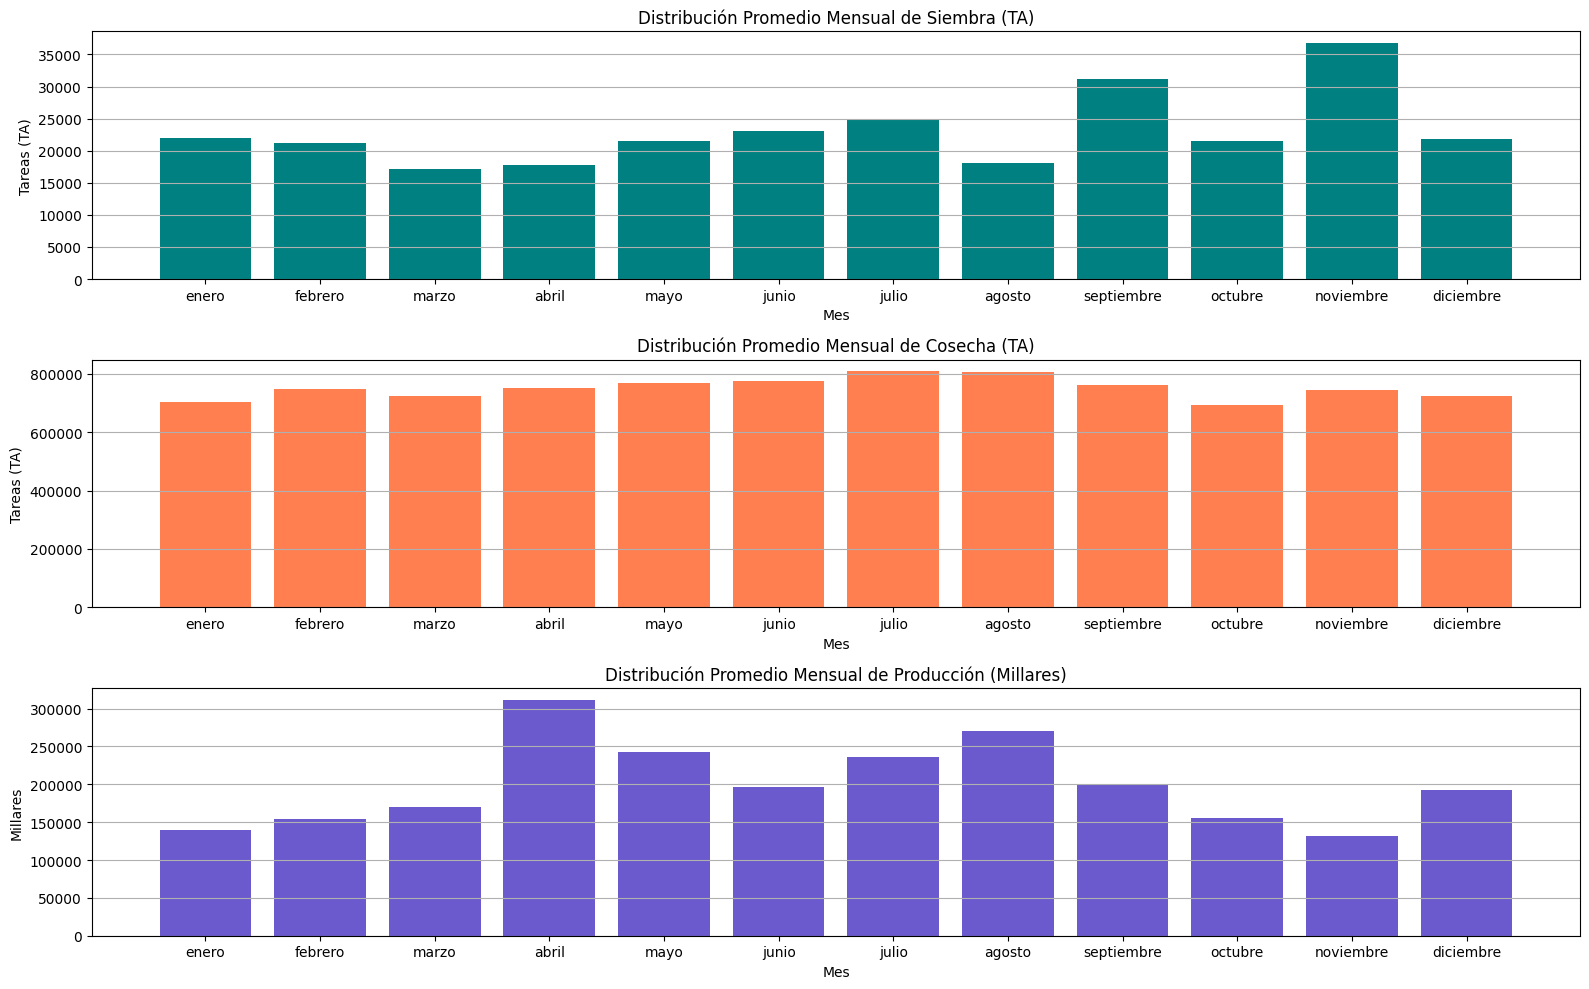

In [53]:
# Extraer los datos mensuales para cada tipo
meses = ['enero', 'febrero', 'marzo', 'abril', 'mayo', 'junio', 'julio', 'agosto', 'septiembre', 'octubre', 'noviembre', 'diciembre']

# Promedio mensual de Siembra (TA)
promedio_siembra_mensual = df_siembra_mensual[meses].mean()

# Promedio mensual de Cosecha (TA)
promedio_cosecha_mensual = df_cosecha_mensual[meses].mean()

# Promedio mensual de Producción (QQ)
promedio_produccion_mensual = df_produccion_mensual[meses].mean()

# Configuración de la figura
plt.figure(figsize=(16, 10))

# Gráfico de Barras para Siembra Mensual (TA)
plt.subplot(3, 1, 1)
plt.bar(meses, promedio_siembra_mensual, color='teal')
plt.xlabel('Mes')
plt.ylabel('Tareas (TA)')
plt.title('Distribución Promedio Mensual de Siembra (TA)')
plt.grid(axis='y')

# Gráfico de Barras para Cosecha Mensual (TA)
plt.subplot(3, 1, 2)
plt.bar(meses, promedio_cosecha_mensual, color='coral')
plt.xlabel('Mes')
plt.ylabel('Tareas (TA)')
plt.title('Distribución Promedio Mensual de Cosecha (TA)')
plt.grid(axis='y')

# Gráfico de Barras para Producción Mensual (QQ)
plt.subplot(3, 1, 3)
plt.bar(meses, promedio_produccion_mensual, color='slateblue')
plt.xlabel('Mes')
plt.ylabel('Millares')
plt.title('Distribución Promedio Mensual de Producción (Millares)')
plt.grid(axis='y')

plt.tight_layout()
plt.show()


- Podemos ver que en los meses de abril hasta agosto la distribucion es mayor


## Incorporacion del Clima al analisis

In [54]:
df_clima = pd.read_excel('Datos_Climaticos.xlsx')

In [55]:
df_clima

,YEAR,MONTH,Región,YEAR.1,MONTH.1,Región.1,Humedad relativa,Nubosidad,Precipitación,Temperatura máxima,Temperatura mínima,Velocidad del viento
0,2011,1,SUROESTE,2011,1,SUROESTE,72.800,3.400,24.600,30.300,19.700,15.600
1,2011,2,SUROESTE,2011,2,SUROESTE,68.100,2.800,6.800,31.000,20.100,16.500
2,2011,3,SUROESTE,2011,3,SUROESTE,64.600,3.000,71.600,30.500,20.400,17.500
3,2011,4,SUROESTE,2011,4,SUROESTE,66.500,3.600,47.800,31.600,22.000,18.200
4,2011,5,SUROESTE,2011,5,SUROESTE,73.100,4.800,58.200,31.700,23.000,16.900
...,...,...,...,...,...,...,...,...,...,...,...,...
2236,2023,8,CENTRAL,2023,8,CENTRAL,82.000,NaN,420.900,33.500,25.900,7.368
2237,2023,9,CENTRAL,2023,9,CENTRAL,81.000,NaN,189.500,34.100,26.400,7.200
2238,2023,10,CENTRAL,2023,10,CENTRAL,79.900,NaN,75.200,34.000,25.700,7.500
2239,2023,11,CENTRAL,2023,11,CENTRAL,82.200,NaN,405.700,32.700,23.300,2.400


In [56]:
# Renombrar el DataFrame a df_clima
datos_climaticos = df_clima 

# Verificar si las columnas 'YEAR', 'MONTH', 'Región' son iguales a 'YEAR.1', 'MONTH.1', 'Región.1'
igualdad_columnas = (
    (datos_climaticos['YEAR'] == datos_climaticos['YEAR.1']) &
    (datos_climaticos['MONTH'] == datos_climaticos['MONTH.1']) &
    (datos_climaticos['Región'] == datos_climaticos['Región.1'])
)

# Verificar cuántas filas cumplen esta condición
igualdad_columnas_total = igualdad_columnas.all()



In [57]:
# Dropear las columnas duplicadas si todas las filas son iguales
if igualdad_columnas_total:
    datos_climaticos.drop(columns=['YEAR.1', 'MONTH.1', 'Región.1'], inplace=True)

# Mostrar el DataFrame actualizado
datos_climaticos


,YEAR,MONTH,Región,Humedad relativa,Nubosidad,Precipitación,Temperatura máxima,Temperatura mínima,Velocidad del viento
0,2011,1,SUROESTE,72.800,3.400,24.600,30.300,19.700,15.600
1,2011,2,SUROESTE,68.100,2.800,6.800,31.000,20.100,16.500
2,2011,3,SUROESTE,64.600,3.000,71.600,30.500,20.400,17.500
3,2011,4,SUROESTE,66.500,3.600,47.800,31.600,22.000,18.200
4,2011,5,SUROESTE,73.100,4.800,58.200,31.700,23.000,16.900
...,...,...,...,...,...,...,...,...,...
2236,2023,8,CENTRAL,82.000,NaN,420.900,33.500,25.900,7.368
2237,2023,9,CENTRAL,81.000,NaN,189.500,34.100,26.400,7.200
2238,2023,10,CENTRAL,79.900,NaN,75.200,34.000,25.700,7.500
2239,2023,11,CENTRAL,82.200,NaN,405.700,32.700,23.300,2.400


In [58]:
datos_climaticos.describe()

,YEAR,MONTH,Humedad relativa,Nubosidad,Precipitación,Temperatura máxima,Temperatura mínima,Velocidad del viento
count,2241.000,2241.000,1753.000,495.000,2079.000,2115.000,2142.000,1758.000
mean,2017.113,6.485,78.151,4.312,125.077,31.239,22.904,11.023
std,3.743,3.451,7.352,0.808,116.117,2.246,14.181,4.447
min,2011.000,1.000,20.700,2.000,0.000,14.800,0.000,1.900
25%,2014.000,3.000,74.800,3.800,41.150,30.200,20.000,8.600
50%,2017.000,6.000,79.500,4.300,92.100,31.400,21.846,10.400
75%,2020.000,9.000,82.700,4.900,173.000,32.700,23.200,12.600
max,2023.000,12.000,91.000,7.300,1060.000,37.300,268.800,96.800


#### Me parece extraño que la temperatura minima tenga un max de 268.8, vamos a investigarlo

In [59]:
# Ordenar los datos por temperatura mínima de manera descendente y mostrar los 20 valores más altos para todas las regiones
top_temperaturas_minimas = df_clima.sort_values(by='Temperatura mínima', ascending=False).head(50)
top_temperaturas_minimas

,YEAR,MONTH,Región,Humedad relativa,Nubosidad,Precipitación,Temperatura máxima,Temperatura mínima,Velocidad del viento
961,2012,11,NOROESTE,NaN,NaN,NaN,NaN,268.800,NaN
983,2014,11,NOROESTE,NaN,NaN,NaN,NaN,224.200,NaN
954,2012,4,NOROESTE,NaN,NaN,NaN,NaN,217.300,NaN
1006,2016,10,NOROESTE,NaN,NaN,NaN,NaN,212.200,NaN
967,2013,5,NOROESTE,NaN,NaN,NaN,NaN,199.700,NaN
977,2014,5,NOROESTE,NaN,NaN,NaN,NaN,198.500,NaN
1004,2016,8,NOROESTE,NaN,NaN,NaN,NaN,192.600,NaN
989,2015,5,NOROESTE,NaN,NaN,NaN,NaN,150.500,NaN
1002,2016,6,NOROESTE,NaN,NaN,NaN,NaN,129.700,NaN
946,2011,8,NOROESTE,NaN,NaN,NaN,NaN,129.700,NaN


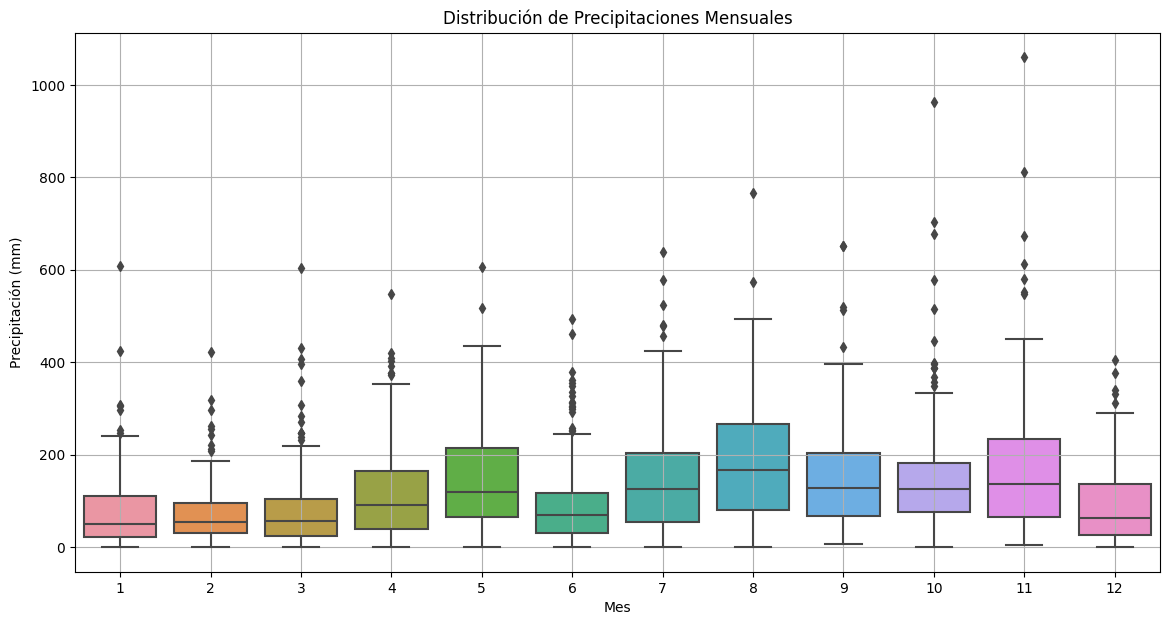

In [61]:
# Crear un gráfico de barras para mostrar la distribución de las precipitaciones mensuales
plt.figure(figsize=(14, 7))
sns.boxplot(x='MONTH', y='Precipitación', data=df_clima)
plt.title('Distribución de Precipitaciones Mensuales')
plt.xlabel('Mes')
plt.ylabel('Precipitación (mm)')
plt.grid(True)
plt.show()


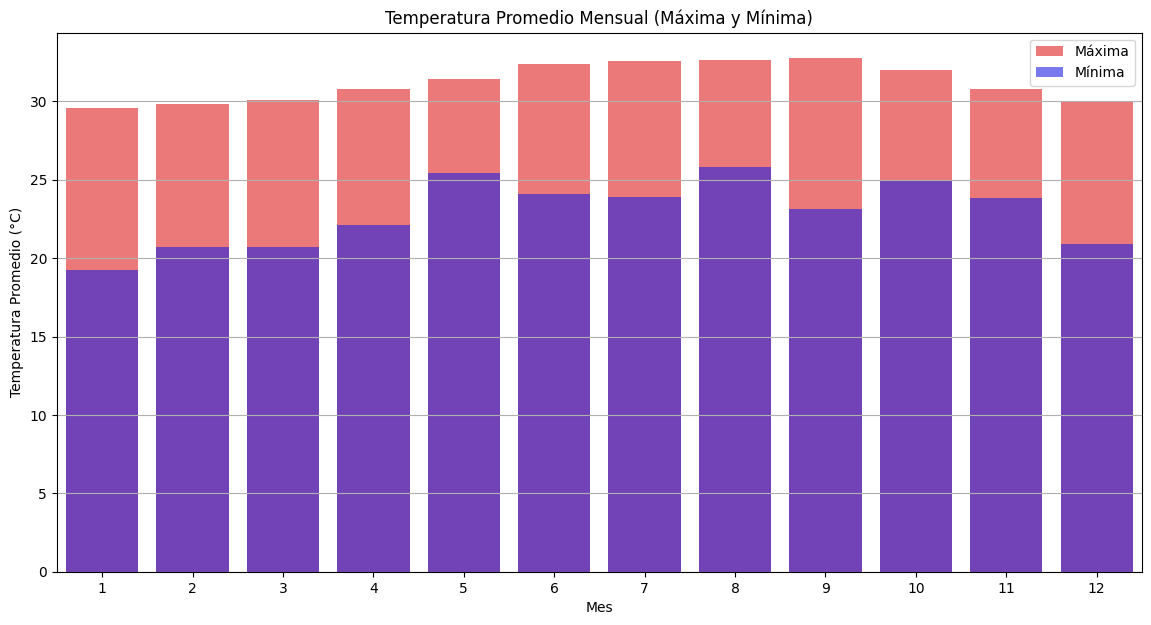

In [63]:
# Crear un gráfico de barras para mostrar la temperatura promedio mensual (máxima y mínima)
plt.figure(figsize=(14, 7))

# Promedio de temperatura máxima
sns.barplot(x='MONTH', y='Temperatura máxima', data=df_clima, estimator=np.mean, ci=None, color='red', alpha=0.6, label='Máxima')

# Promedio de temperatura mínima
sns.barplot(x='MONTH', y='Temperatura mínima', data=df_clima, estimator=np.mean, ci=None, color='blue', alpha=0.6, label='Mínima')

plt.title('Temperatura Promedio Mensual (Máxima y Mínima)')
plt.xlabel('Mes')
plt.ylabel('Temperatura Promedio (°C)')
plt.legend()
plt.grid(axis='y')
plt.show()


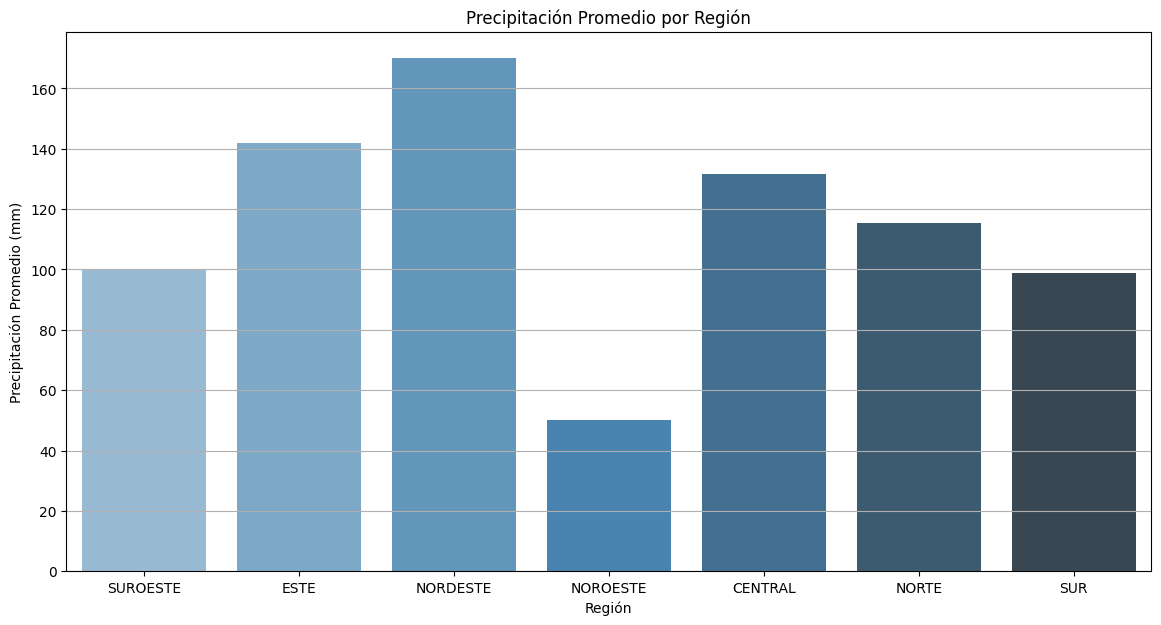

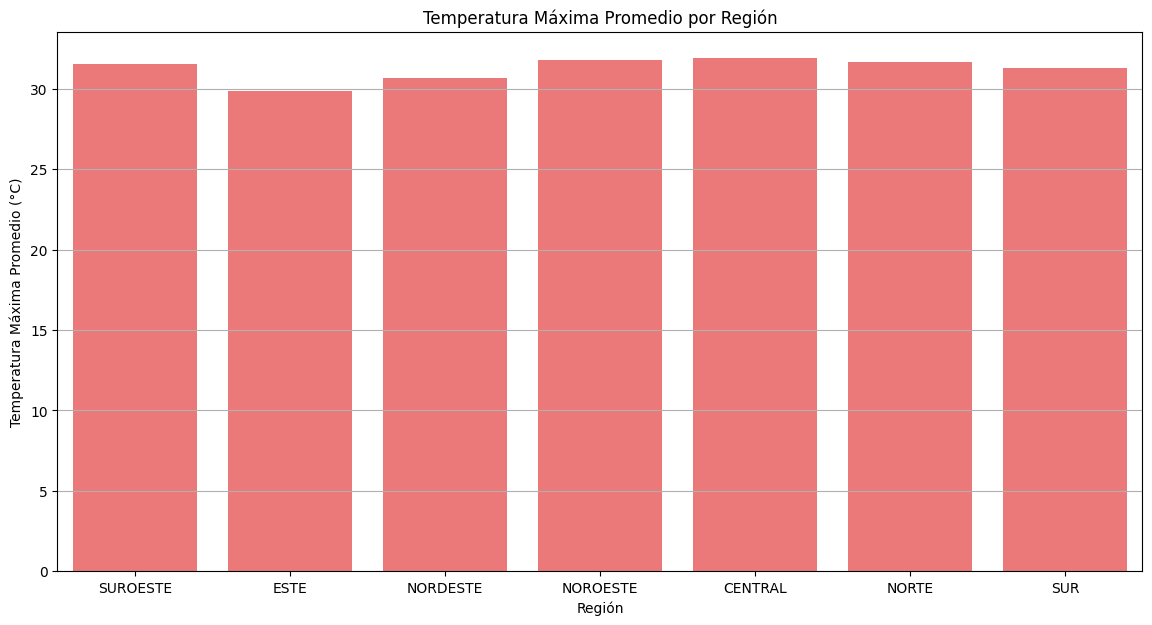

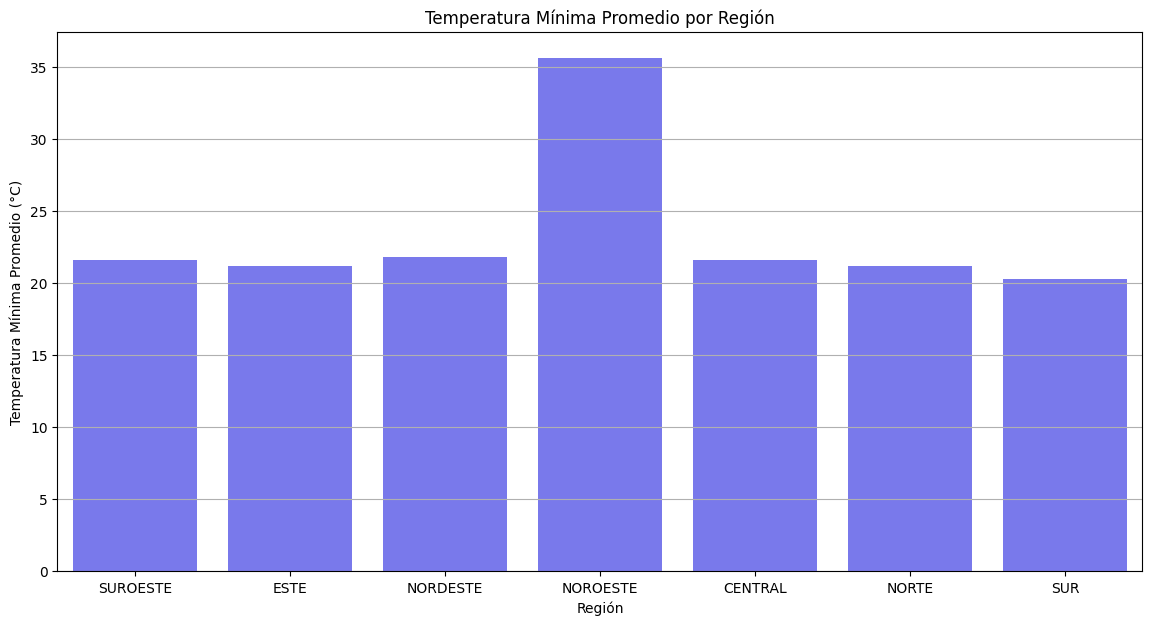

In [64]:
# Crear gráficos de barras para mostrar la distribución de la precipitación y temperatura (máxima y mínima) por región

# Precipitación por región
plt.figure(figsize=(14, 7))
sns.barplot(x='Región', y='Precipitación', data=df_clima, estimator=np.mean, ci=None, palette='Blues_d')
plt.title('Precipitación Promedio por Región')
plt.xlabel('Región')
plt.ylabel('Precipitación Promedio (mm)')
plt.grid(axis='y')
plt.show()

# Temperatura máxima por región
plt.figure(figsize=(14, 7))
sns.barplot(x='Región', y='Temperatura máxima', data=df_clima, estimator=np.mean, ci=None, color='red', alpha=0.6)
plt.title('Temperatura Máxima Promedio por Región')
plt.xlabel('Región')
plt.ylabel('Temperatura Máxima Promedio (°C)')
plt.grid(axis='y')
plt.show()

# Temperatura mínima por región
plt.figure(figsize=(14, 7))
sns.barplot(x='Región', y='Temperatura mínima', data=df_clima, estimator=np.mean, ci=None, color='blue', alpha=0.6)
plt.title('Temperatura Mínima Promedio por Región')
plt.xlabel('Región')
plt.ylabel('Temperatura Mínima Promedio (°C)')
plt.grid(axis='y')
plt.show()


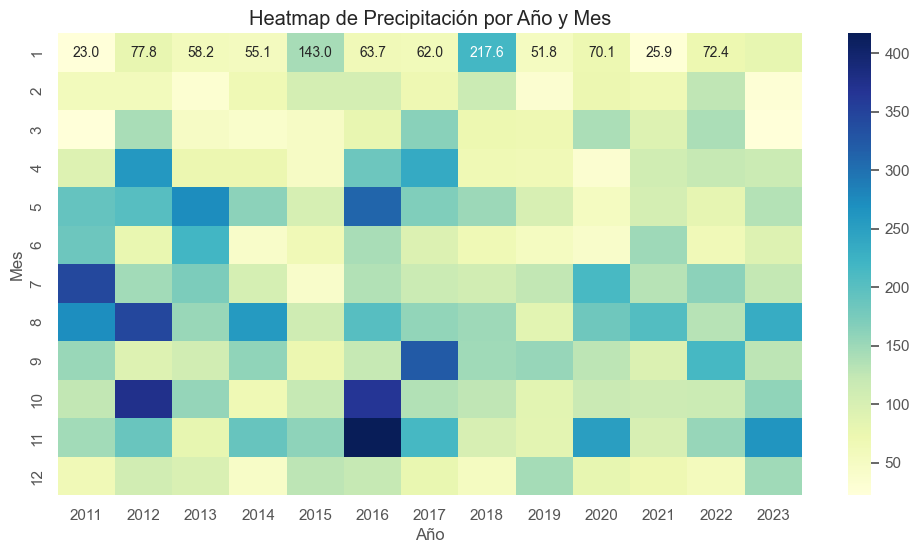

In [126]:
# Heatmap de Precipitación por Año y Mes
plt.figure(figsize=(12, 6))
pivot_table = df_clima.pivot_table(values='Precipitación', index='MONTH', columns='YEAR', aggfunc='mean')
sns.heatmap(pivot_table, cmap='YlGnBu', annot=True, fmt=".1f")
plt.title('Heatmap de Precipitación por Año y Mes')
plt.xlabel('Año')
plt.ylabel('Mes')
plt.show()

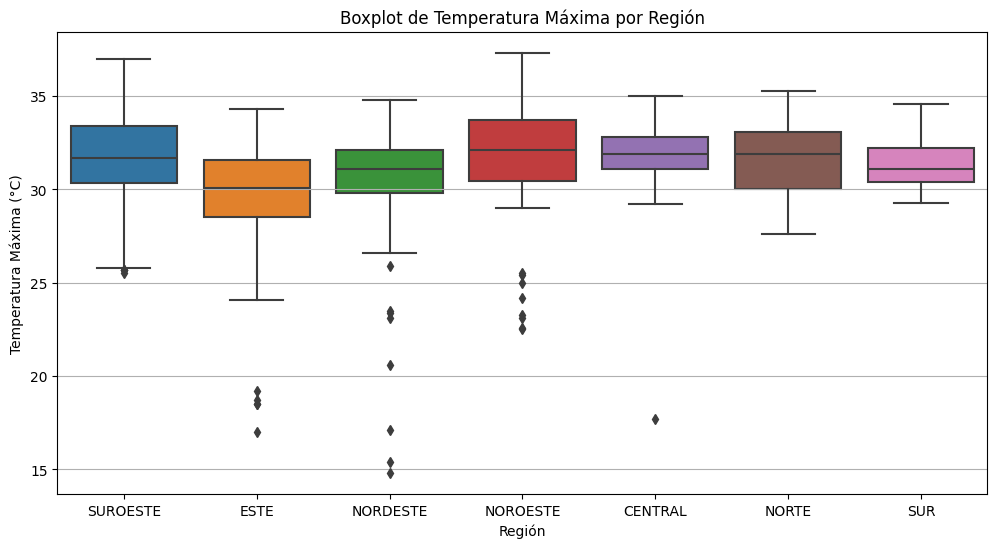

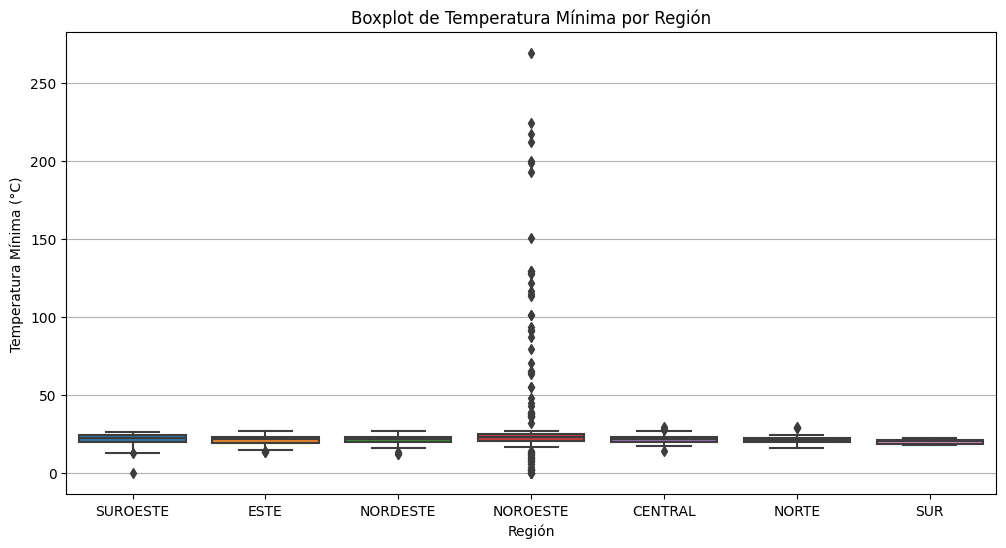

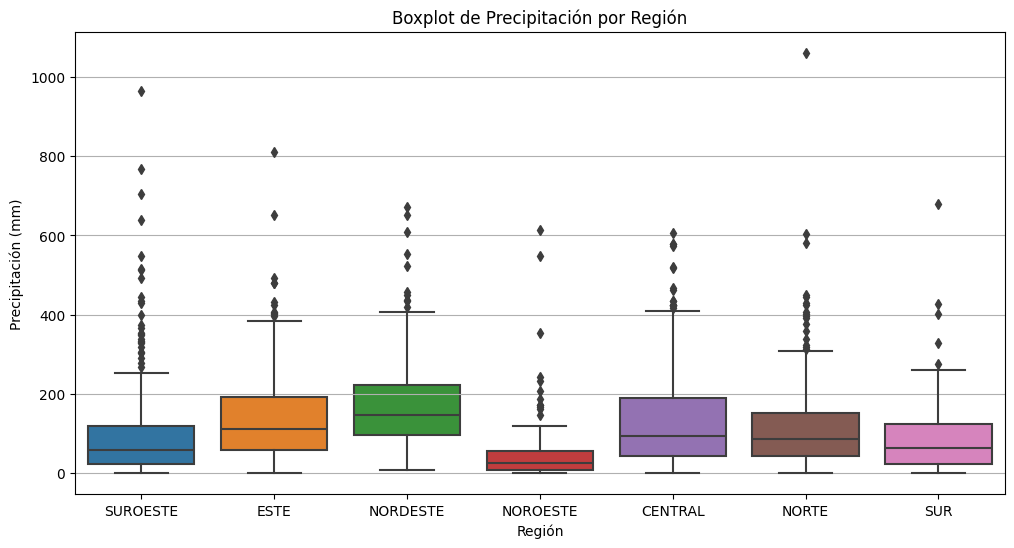

In [65]:
# Crear boxplots para identificar outliers en los parámetros meteorológicos

# Boxplot para la temperatura máxima
plt.figure(figsize=(12, 6))
sns.boxplot(x='Región', y='Temperatura máxima', data=df_clima)
plt.title('Boxplot de Temperatura Máxima por Región')
plt.xlabel('Región')
plt.ylabel('Temperatura Máxima (°C)')
plt.grid(axis='y')
plt.show()

# Boxplot para la temperatura mínima
plt.figure(figsize=(12, 6))
sns.boxplot(x='Región', y='Temperatura mínima', data=df_clima)
plt.title('Boxplot de Temperatura Mínima por Región')
plt.xlabel('Región')
plt.ylabel('Temperatura Mínima (°C)')
plt.grid(axis='y')
plt.show()

# Boxplot para la precipitación
plt.figure(figsize=(12, 6))
sns.boxplot(x='Región', y='Precipitación', data=df_clima)
plt.title('Boxplot de Precipitación por Región')
plt.xlabel('Región')
plt.ylabel('Precipitación (mm)')
plt.grid(axis='y')
plt.show()


#### Como vimos en el describe, este dataset tiene unos outliers increible en la region NOROESTE.

###  Dejamos esto en STANDBY

## INCORPORACION DE DATOS DE CLIMA OPTIMIZADOS

In [67]:
# Cargar el archivo Excel proporcionado por el usuario
file_path_clima = "datos_provincias_clima.xlsx"

# Leer las hojas relevantes
df_precipitacion = pd.read_excel(file_path_clima, sheet_name='datos_prec_provincias')
df_temperatura = pd.read_excel(file_path_clima, sheet_name='datos_temp_provincias')


In [101]:
df_precipitacion.head(20)

,code,name,date,precipitation,region
0,DOM.721108,Azua,2011-01-01,48.820,SUROESTE
1,DOM.721109,Baoruco,2011-01-01,27.410,SUR
2,DOM.721110,Barahona,2011-01-01,29.490,SUR
3,DOM.721111,Dajabon,2011-01-01,47.380,NOROESTE
4,DOM.721112,Santo Domingo,2011-01-01,62.340,CENTRAL
5,DOM.721113,Duarte,2011-01-01,98.770,NORDESTE
6,DOM.721114,El Seibo,2011-01-01,61.520,ESTE
7,DOM.721115,Espaillat,2011-01-01,124.640,NORTE
8,DOM.721116,Independencia,2011-01-01,26.950,SUR
9,DOM.721117,La Altagracia,2011-01-01,63.230,ESTE


In [69]:
df_temperatura

,code,name,date,average_temperature,region
0,DOM.721108,Azua,2011-01-01,19.540,SUROESTE
1,DOM.721109,Baoruco,2011-01-01,21.050,SUR
2,DOM.721110,Barahona,2011-01-01,22.560,SUR
3,DOM.721111,Dajabon,2011-01-01,22.380,NOROESTE
4,DOM.721112,Santo Domingo,2011-01-01,23.500,CENTRAL
...,...,...,...,...,...
4603,DOM.7236854,Hato Mayor,2022-12-01,24.470,ESTE
4604,DOM.7236855,Monsenor Nouel,2022-12-01,21.840,NORCENTRAL
4605,DOM.7236856,Monte Plata,2022-12-01,24.210,CENTRAL
4606,DOM.7236857,San José de Ocoa,2022-12-01,20.370,CENTRAL


In [102]:
# Combinar los DataFrames df_precipitacion y df_temperatura por las columnas 'code', 'name' y 'date'
df_combined_provinces = pd.merge(df_precipitacion, df_temperatura, on=['code', 'name', 'date'])

# Renombrar columnas para mayor claridad
df_combined_provinces.columns = ['code', 'name', 'date', 'precipitation', 'region_precipitation', 'average_temperature', 'region_temperature']

df_combined_provinces.head(20)


,code,name,date,precipitation,region_precipitation,average_temperature,region_temperature
0,DOM.721108,Azua,2011-01-01,48.820,SUROESTE,19.540,SUROESTE
1,DOM.721109,Baoruco,2011-01-01,27.410,SUR,21.050,SUR
2,DOM.721110,Barahona,2011-01-01,29.490,SUR,22.560,SUR
3,DOM.721111,Dajabon,2011-01-01,47.380,NOROESTE,22.380,NOROESTE
4,DOM.721112,Santo Domingo,2011-01-01,62.340,CENTRAL,23.500,CENTRAL
5,DOM.721113,Duarte,2011-01-01,98.770,NORDESTE,23.170,NORDESTE
6,DOM.721114,El Seibo,2011-01-01,61.520,ESTE,24.000,ESTE
7,DOM.721115,Espaillat,2011-01-01,124.640,NORTE,22.240,NORTE
8,DOM.721116,Independencia,2011-01-01,26.950,SUR,20.840,SUR
9,DOM.721117,La Altagracia,2011-01-01,63.230,ESTE,24.370,ESTE


In [103]:
# Verificar si hay diferencias entre las columnas 'region_precipitation' y 'region_temperature'
differences = df_combined_provinces[df_combined_provinces['region_precipitation'] != df_combined_provinces['region_temperature']]

# Si no hay diferencias, eliminamos una columna y renombramos la otra
if differences.empty:
    df_combined_provinces.drop(columns=['region_precipitation'], inplace=True)
    df_combined_provinces.rename(columns={'region_temperature': 'region'}, inplace=True)
else:
    print("Existen diferencias en las columnas de región.")

df_combined_provinces.head(20)

,code,name,date,precipitation,average_temperature,region
0,DOM.721108,Azua,2011-01-01,48.820,19.540,SUROESTE
1,DOM.721109,Baoruco,2011-01-01,27.410,21.050,SUR
2,DOM.721110,Barahona,2011-01-01,29.490,22.560,SUR
3,DOM.721111,Dajabon,2011-01-01,47.380,22.380,NOROESTE
4,DOM.721112,Santo Domingo,2011-01-01,62.340,23.500,CENTRAL
5,DOM.721113,Duarte,2011-01-01,98.770,23.170,NORDESTE
6,DOM.721114,El Seibo,2011-01-01,61.520,24.000,ESTE
7,DOM.721115,Espaillat,2011-01-01,124.640,22.240,NORTE
8,DOM.721116,Independencia,2011-01-01,26.950,20.840,SUR
9,DOM.721117,La Altagracia,2011-01-01,63.230,24.370,ESTE


In [128]:
# Agrupar por mes y región, calculando los promedios de precipitación y temperatura
df_grouped = df_combined_provinces.groupby([df_combined_provinces['date'].dt.to_period('M'), 'region']).agg({
    'precipitation': 'mean',
    'average_temperature': 'mean'
}).reset_index()

# Renombrar las columnas para mayor claridad
df_grouped.columns = ['month', 'region', 'average_precipitation', 'average_temperature']

df_grouped.head()


,month,region,average_precipitation,average_temperature
0,2011-01,CENTRAL,59.039,23.024
1,2011-01,ESTE,63.233,24.127
2,2011-01,NORCENTRAL,85.123,21.040
3,2011-01,NORDESTE,104.555,23.220
4,2011-01,NOROESTE,59.955,21.975


In [73]:
df_grouped.describe()

,average_precipitation,average_temperature
count,1152.000,1152.000
mean,125.018,24.768
std,72.790,1.712
min,4.675,20.077
25%,72.447,23.568
50%,113.887,24.797
75%,165.464,26.056
max,460.520,28.695


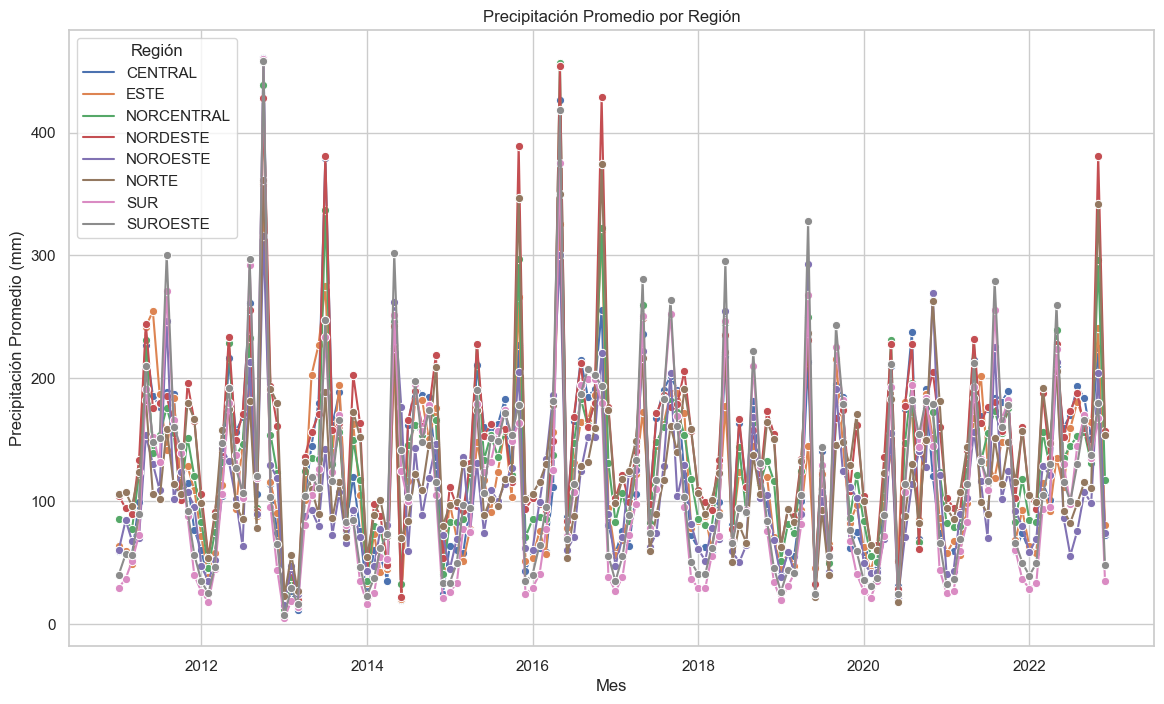

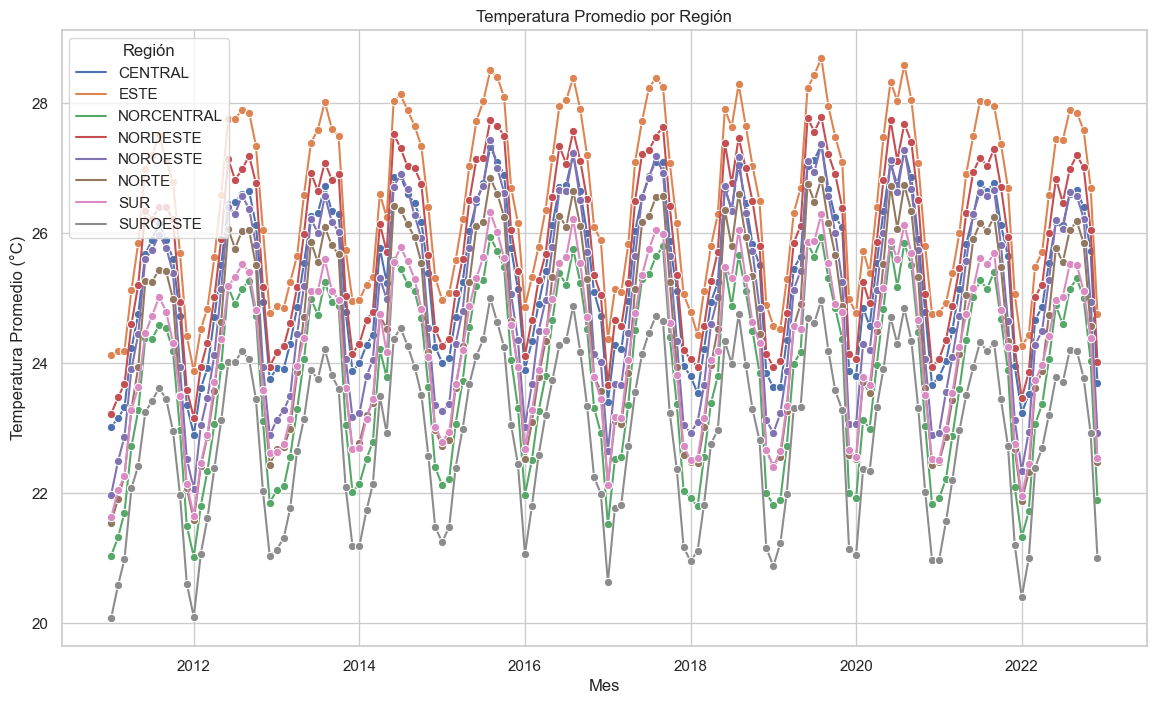

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convertir la columna 'month' a datetime para asegurar compatibilidad
df_grouped['month'] = df_grouped['month'].dt.to_timestamp()

# Configuración de estilo
sns.set(style="whitegrid")

# Crear una figura y ejes para los gráficos
fig, ax1 = plt.subplots(figsize=(14, 8))

# Gráfico de precipitación promedio por región
sns.lineplot(data=df_grouped, x='month', y='average_precipitation', hue='region', ax=ax1, marker='o')
ax1.set_title('Precipitación Promedio por Región')
ax1.set_ylabel('Precipitación Promedio (mm)')
ax1.set_xlabel('Mes')
ax1.legend(title='Región')

# Crear una figura y ejes para los gráficos
fig, ax2 = plt.subplots(figsize=(14, 8))

# Gráfico de temperatura promedio por región
sns.lineplot(data=df_grouped, x='month', y='average_temperature', hue='region', ax=ax2, marker='o')
ax2.set_title('Temperatura Promedio por Región')
ax2.set_ylabel('Temperatura Promedio (°C)')
ax2.set_xlabel('Mes')
ax2.legend(title='Región')

# Mostrar los gráficos
plt.show()


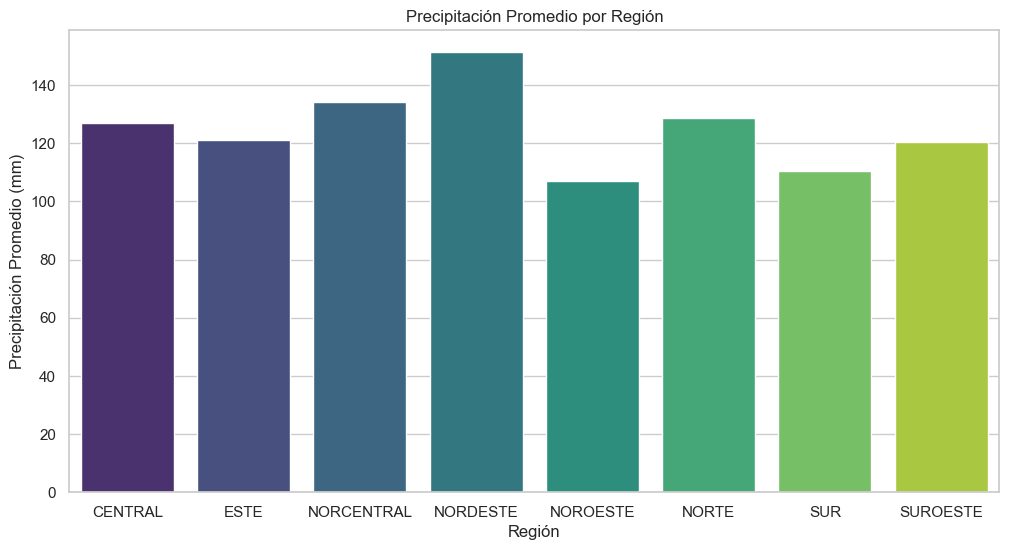

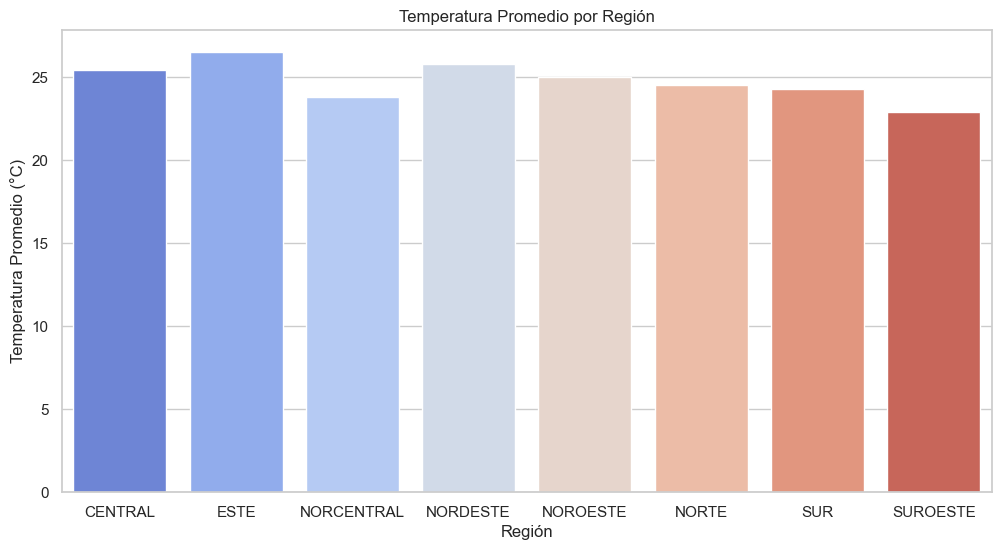

In [75]:
# Configuración de estilo
sns.set(style="whitegrid")

# Crear una figura y ejes para los gráficos
fig, ax1 = plt.subplots(figsize=(12, 6))

# Gráfico de precipitación promedio por región
sns.barplot(data=df_grouped, x='region', y='average_precipitation', ax=ax1, ci=None, palette='viridis')
ax1.set_title('Precipitación Promedio por Región')
ax1.set_ylabel('Precipitación Promedio (mm)')
ax1.set_xlabel('Región')

# Crear una figura y ejes para los gráficos
fig, ax2 = plt.subplots(figsize=(12, 6))

# Gráfico de temperatura promedio por región
sns.barplot(data=df_grouped, x='region', y='average_temperature', ax=ax2, ci=None, palette='coolwarm')
ax2.set_title('Temperatura Promedio por Región')
ax2.set_ylabel('Temperatura Promedio (°C)')
ax2.set_xlabel('Región')

# Mostrar los gráficos
plt.show()

### Uniendo los DF

#### Unimos el df_cosecha_region_final que calculamos multiplicando df_cosecha_region * 12, a los otros datos por region

In [76]:
# Asegurarse de que los DataFrames tengan índices únicos
df_siembra_region = df_siembra_region.reset_index(drop=True)
df_cosecha_region_final = df_cosecha_region_final.reset_index(drop=True)
df_produccion_region = df_produccion_region.reset_index(drop=True)

# Asegurarse de que los DataFrames tienen la columna 'tipo' con los valores correctos
df_siembra_region['tipo'] = 1
df_cosecha_region_final['tipo'] = 2
df_produccion_region['tipo'] = 3

# Verificar que no haya columnas duplicadas y que todas las columnas necesarias estén presentes
columnas_esperadas = df_siembra_region.columns.intersection(df_cosecha_region_final.columns).intersection(df_produccion_region.columns)

df_siembra_region = df_siembra_region[columnas_esperadas]
df_cosecha_region_final = df_cosecha_region_final[columnas_esperadas]
df_produccion_region = df_produccion_region[columnas_esperadas]

# Concatenar los DataFrames ajustados
df_combinado = pd.concat([df_siembra_region, df_cosecha_region_final, df_produccion_region], ignore_index=True)

# Mostrar el DataFrame combinado
df_combinado.head(40)

,año,producto,norte,nordeste,noroeste,norcentral,central,sur,suroeste,este,tipo,total_regional
0,2011,PLATANO,29168.000,20431.000,21291.000,58065.000,27444.000,25692.000,18619.000,7957.000,1,208667.000
1,2012,PLATANO,27059.000,25306.000,24307.000,53750.000,33144.000,26640.000,24488.000,10683.000,1,225377.000
2,2013,PLATANO,31432.000,35073.000,27425.000,45611.000,42155.000,28041.000,26106.000,13650.000,1,249493.000
3,2014,PLATANO,47746.645,40709.839,20570.603,57849.880,21643.572,25968.531,31178.124,9814.807,1,255482.000
4,2015,PLATANO,48009.566,38539.882,20503.949,61979.452,13763.425,30299.986,33465.270,13802.470,1,260364.000
5,2016,PLATANO,54157.462,32806.357,12882.472,47481.381,14892.911,24063.472,39990.689,10290.256,1,236565.000
6,2017,PLATANO,47589.433,35710.393,15532.424,60694.668,13476.770,26471.017,33970.027,11986.268,1,245431.000
7,2018,PLATANO,46015.508,65845.335,16442.576,63695.908,8247.317,28717.714,35875.204,9290.437,1,274130.000
8,2019,PLATANO,41301.421,50028.641,14393.960,63458.825,14083.792,40151.659,42452.240,14433.463,1,280304.000
9,2020,PLATANO,40415.920,53356.009,25208.679,79387.808,13276.083,37767.060,52351.222,14225.219,1,315988.000


#### Calculamos el rendimiento

In [131]:
# Filtrar los datos para producción (tipo 3) y cosecha (tipo 2)
df_produccion = df_combinado[df_combinado['tipo'] == 3]
df_cosecha = df_combinado[df_combinado['tipo'] == 2]

# Alinear los DataFrames por año
df_produccion = df_produccion.sort_values(by='año').reset_index(drop=True)
df_cosecha = df_cosecha.sort_values(by='año').reset_index(drop=True)

# Calcular el rendimiento como producción / cosecha
df_produccion['rendimiento'] = df_produccion['total_regional'] / df_cosecha['total_regional']

# Eliminar la columna 'rendimiento' si ya existe en df_combinado
if 'rendimiento' in df_combinado.columns:
    df_combinado.drop(columns=['rendimiento'], inplace=True)

# Añadir la columna de rendimiento al df_combinado
df_combinado = df_combinado.merge(df_produccion[['año', 'rendimiento']], on='año', how='left')

# Mostrar el DataFrame combinado con la nueva columna
df_combinado.head()


,año,producto,norte,nordeste,noroeste,norcentral,central,sur,suroeste,este,tipo,total_regional,rendimiento
0,2011,PLATANO,29168.000,20431.000,21291.000,58065.000,27444.000,25692.000,18619.000,7957.000,1,208667.000,0.223
1,2012,PLATANO,27059.000,25306.000,24307.000,53750.000,33144.000,26640.000,24488.000,10683.000,1,225377.000,0.236
2,2013,PLATANO,31432.000,35073.000,27425.000,45611.000,42155.000,28041.000,26106.000,13650.000,1,249493.000,0.257
3,2014,PLATANO,47746.645,40709.839,20570.603,57849.880,21643.572,25968.531,31178.124,9814.807,1,255482.000,0.280
4,2015,PLATANO,48009.566,38539.882,20503.949,61979.452,13763.425,30299.986,33465.270,13802.470,1,260364.000,0.241


In [78]:
# Filtrar los datos para producción (tipo 3) y cosecha (tipo 2)
df_produccion = df_combinado[df_combinado['tipo'] == 3]
df_cosecha = df_combinado[df_combinado['tipo'] == 2]

# Alinear los DataFrames por año
df_produccion = df_produccion.sort_values(by='año').reset_index(drop=True)
df_cosecha = df_cosecha.sort_values(by='año').reset_index(drop=True)

# Crear un nuevo DataFrame para almacenar el rendimiento
columnas_regiones = ['norte', 'nordeste', 'noroeste', 'norcentral', 'central', 'sur', 'suroeste', 'este']
df_rendimiento = pd.DataFrame({'año': df_produccion['año']})

# Calcular el rendimiento para cada región
for region in columnas_regiones:
    df_rendimiento[region] = df_produccion[region] / df_cosecha[region]

# Mostrar el DataFrame de rendimiento
print(df_rendimiento.head(20))


     año  norte  nordeste  noroeste  norcentral  central   sur  suroeste  este
0   2011  0.243     0.150     0.694       0.150    0.370 0.280     0.323 1.281
1   2012  0.243     0.138     0.800       0.120    0.453 0.406     0.285 2.033
2   2013  0.320     0.169     0.626       0.136    0.679 0.199     0.221 0.658
3   2014  0.291     0.195     0.746       0.141    0.751 0.328     0.260 0.579
4   2015  0.264     0.152     0.681       0.096    0.732 0.456     0.449 1.196
5   2016  1.483     0.373     0.658       0.056    0.841 0.183     0.205 1.080
6   2017  0.887     0.330     0.534       0.162    0.752 0.233     0.202 0.855
7   2018  0.366     0.274     0.458       0.211    0.372 0.244     0.248 0.523
8   2019  0.532     0.334     0.853       0.137    0.358 0.223     0.246 0.584
9   2020  1.151     0.513     0.311       0.194    0.657 0.243     0.337 0.957
10  2021  1.426     0.324     0.316       0.129    0.916 0.227     0.240 0.689
11  2022  1.443     0.316     0.254       0.104    0

#### Calculo de rendimiento en los df_mensuales

In [130]:
SCP_mensual.head()

,PRODUCTO,ENERO,FEBRERO,MARZO,ABRIL,MAYO,JUNIO,JULIO,AGOSTO,SEPT.,OCTUBRE,NOV.,DIC.,Total,Año,Tipo
0,PLATANO,17893.000,14036.000,10798.000,11614.000,18253.000,17554.000,18852.000,13166.000,18498.000,15580.000,37013.000,15410.000,208667.000,2011,1
1,PLATANO,673917.000,690886.000,672241.000,678409.000,698357.000,725877.000,730121.000,742675.000,723181.000,701047.000,718248.000,694574.000,8449533.000,2011,2
2,PLATANO,110083.000,143400.000,141162.000,129111.000,141034.000,172800.000,177158.000,190457.000,167571.000,132043.000,125470.000,251047.000,1881336.000,2011,3
3,PLATANO,18115.000,14837.000,17221.000,14142.000,19740.000,17597.000,16334.000,10584.000,19640.000,13843.000,38742.000,24582.000,225377.000,2012,1
4,PLATANO,693877.000,715357.000,720124.000,722410.000,717546.000,738508.000,755478.000,765399.000,723294.000,630117.000,737599.000,687151.000,8606860.000,2012,2


In [82]:
# Crear un DataFrame vacío para almacenar los resultados de rendimiento mensual
df_rendimiento_mensual = pd.DataFrame({'año': df_produccion_mensual['año']})

# Iterar sobre cada mes para calcular el rendimiento y agregarlo como una columna
for mes in ['enero', 'febrero', 'marzo', 'abril', 'mayo', 'junio', 'julio', 'agosto', 'septiembre', 'octubre', 'noviembre', 'diciembre']:
    df_rendimiento_mensual[mes] = df_produccion_mensual[mes] / df_cosecha_mensual[mes]

# Mostrar el DataFrame de rendimiento mensual por año
df_rendimiento_mensual


,año,enero,febrero,marzo,abril,mayo,junio,julio,agosto,septiembre,octubre,noviembre,diciembre
0,2011,0.163,0.208,0.210,0.190,0.202,0.238,0.243,0.256,0.232,0.188,0.175,0.361
1,2012,0.184,0.203,0.200,0.257,0.202,0.235,0.237,0.286,0.247,0.250,0.172,0.363
2,2013,0.181,0.201,0.203,0.425,0.214,0.234,0.262,0.304,0.257,0.252,0.180,0.365
3,2014,0.205,0.204,0.214,0.427,0.317,0.263,0.387,0.277,0.259,0.231,0.188,0.379
4,2015,0.203,0.204,0.211,0.419,0.315,0.268,0.258,0.268,0.207,0.186,0.171,0.178
5,2016,0.202,0.201,0.234,0.442,0.338,0.258,0.273,0.305,0.278,0.210,0.183,0.196
6,2017,0.199,0.202,0.255,0.457,0.382,0.258,0.289,0.332,0.280,0.212,0.182,0.197
7,2018,0.197,0.208,0.246,0.459,0.386,0.253,0.292,0.335,0.273,0.204,0.187,0.195
8,2019,0.207,0.209,0.246,0.451,0.384,0.251,0.289,0.333,0.271,0.201,0.181,0.192
9,2020,0.226,0.217,0.268,0.487,0.470,0.296,0.339,0.686,0.282,0.200,0.151,0.281


In [83]:
# Crear un DataFrame vacío para almacenar los resultados de rendimiento mensual
df_rendimiento_mensual_por_mes = pd.DataFrame()

# Iterar sobre cada mes para calcular el rendimiento
for mes in ['enero', 'febrero', 'marzo', 'abril', 'mayo', 'junio', 'julio', 'agosto', 'septiembre', 'octubre', 'noviembre', 'diciembre']:
    df_rendimiento_mensual_mes = pd.DataFrame({
        'año': df_produccion_mensual['año'],
        'mes': mes,
        'rendimiento': df_produccion_mensual[mes] / df_cosecha_mensual[mes]
    })
    # Añadir los resultados al DataFrame final
    df_rendimiento_mensual_por_mes = pd.concat([df_rendimiento_mensual_por_mes, df_rendimiento_mensual_mes])

# Resetear el índice del DataFrame final
df_rendimiento_mensual_por_mes.reset_index(drop=True, inplace=True)

# Mostrar el DataFrame de rendimiento mensual por mes
df_rendimiento_mensual_por_mes


,año,mes,rendimiento
0,2011,enero,0.163
1,2012,enero,0.184
2,2013,enero,0.181
3,2014,enero,0.205
4,2015,enero,0.203
...,...,...,...
151,2019,diciembre,0.192
152,2020,diciembre,0.281
153,2021,diciembre,0.241
154,2022,diciembre,0.254


#### Union de datos de clima con rendimiento a nivel mensual

In [91]:
# Convertir las columnas 'month' a datetime en ambos DataFrames
df_rendimiento_mensual_por_mes['month'] = pd.to_datetime(df_rendimiento_mensual_por_mes['month'], format='%Y-%m')
df_grouped['month'] = pd.to_datetime(df_grouped['month'], format='%Y-%m')

# Agrupar df_grouped por 'month' y calcular promedios, excluyendo la columna 'region'
df_grouped_avg = df_grouped.drop(columns=['region']).groupby('month').mean().reset_index()

# Combinar los DataFrames en función de la columna 'month'
df_combined = pd.merge(df_grouped_avg, df_rendimiento_mensual_por_mes, on='month', how='inner')

# Mostrar el DataFrame combinado
df_combined.head(20)


,month,average_precipitation,average_temperature,año,mes,rendimiento
0,2011-01-01,68.367,22.080,2011,enero,0.163
1,2011-02-01,72.850,22.398,2011,febrero,0.208
2,2011-03-01,67.817,22.660,2011,marzo,0.210
3,2011-04-01,100.228,23.658,2011,abril,0.190
4,2011-05-01,210.222,24.195,2011,mayo,0.202
5,2011-06-01,161.581,25.248,2011,junio,0.238
6,2011-07-01,149.017,25.357,2011,julio,0.243
7,2011-08-01,208.704,25.590,2011,agosto,0.256
8,2011-09-01,153.801,25.425,2011,septiembre,0.232
9,2011-10-01,117.551,25.058,2011,octubre,0.188


#### Agrupamos por año y sumamos los rendimientos

In [129]:
# Asegurarse de que la columna 'month' está en formato datetime
df_combined['month'] = pd.to_datetime(df_combined['month'])

# Agregar una columna para el año
df_combined['año'] = df_combined['month'].dt.year

# Agrupar por año y sumar los rendimientos
rendimiento_anual = df_combined.groupby('año')['rendimiento'].sum().reset_index()

# Renombrar la columna para mayor claridad
rendimiento_anual.rename(columns={'rendimiento': 'rendimiento_sumado'}, inplace=True)

# Mostrar el resultado
rendimiento_anual.head(20)


,año,rendimiento_sumado
0,2011,2.667
1,2012,2.835
2,2013,3.079
3,2014,3.352
4,2015,2.889
5,2016,3.121
6,2017,3.246
7,2018,3.234
8,2019,3.215
9,2020,3.904


#### LOS DATOS CORRESPONDEN CON EL RENDIMIENTO EN LOS DATOS DEL MINISTERIO AGRICULTURA!!!

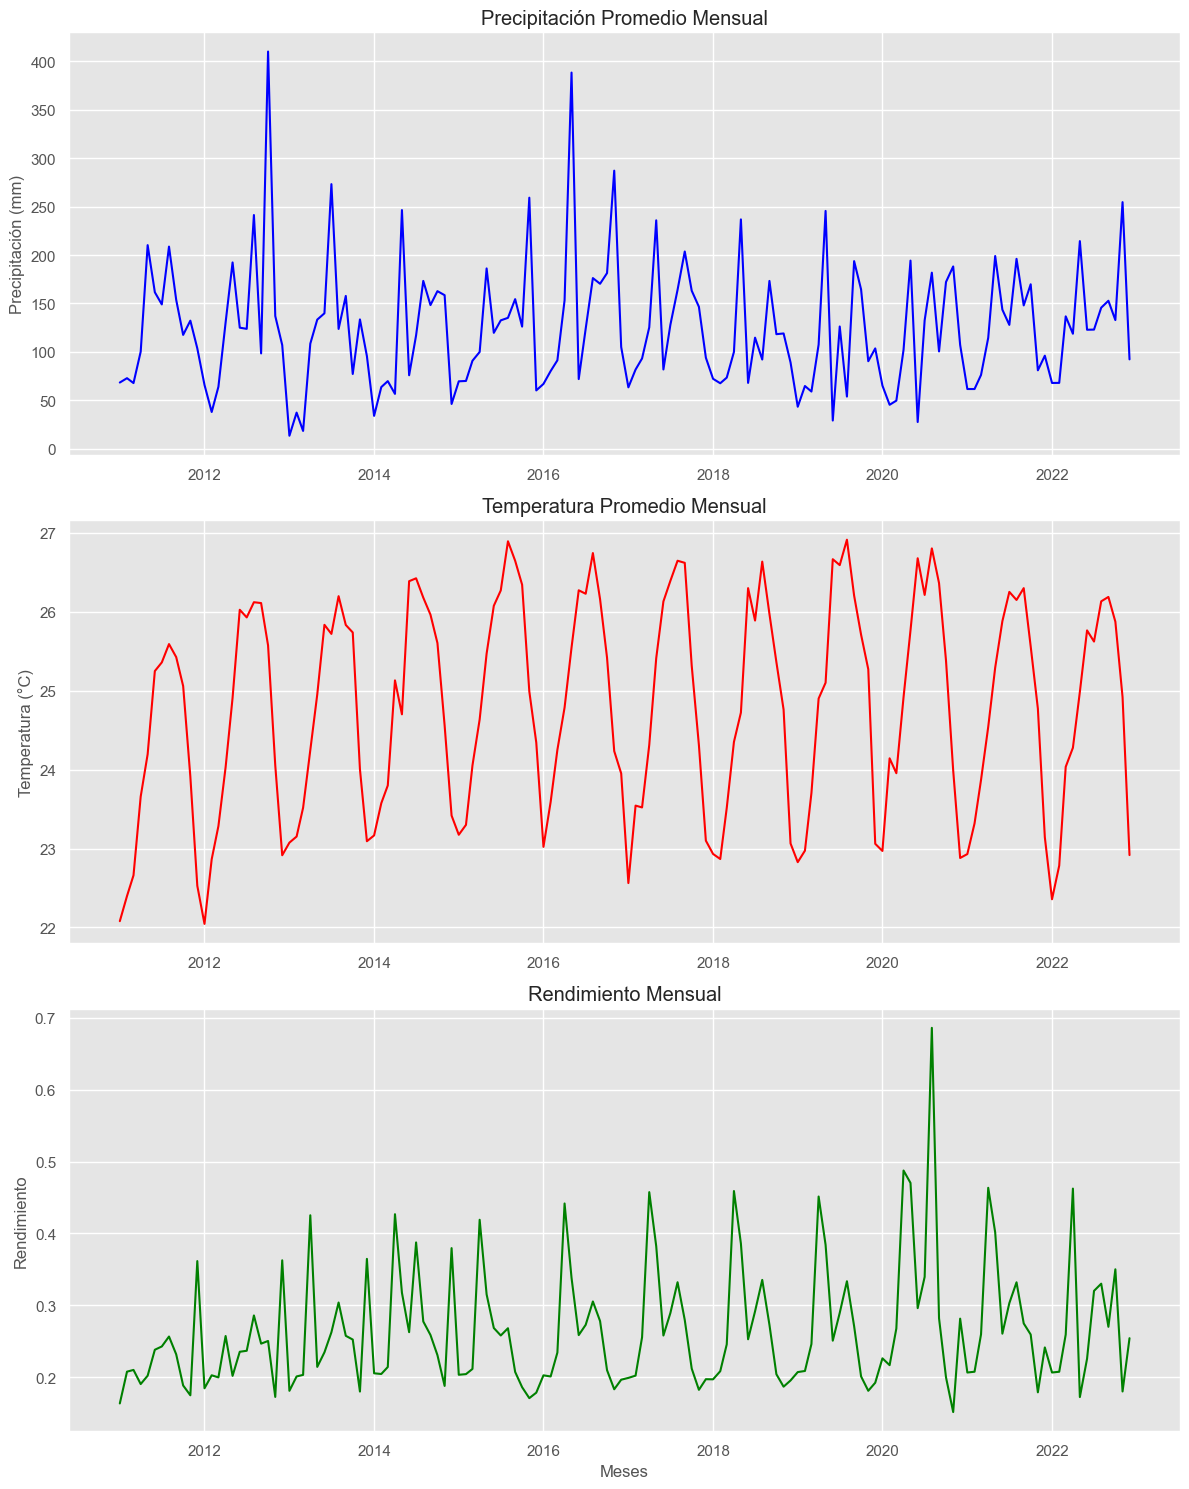

In [93]:
import matplotlib.pyplot as plt
import seaborn as sns

# Establecer un estilo de gráficos válido
plt.style.use('ggplot')

# Crear figura y ejes
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(12, 15))

# Gráfico de precipitación
sns.lineplot(data=df_combined, x='month', y='average_precipitation', ax=axes[0], color='blue')
axes[0].set_title('Precipitación Promedio Mensual')
axes[0].set_ylabel('Precipitación (mm)')
axes[0].set_xlabel('')

# Gráfico de temperatura
sns.lineplot(data=df_combined, x='month', y='average_temperature', ax=axes[1], color='red')
axes[1].set_title('Temperatura Promedio Mensual')
axes[1].set_ylabel('Temperatura (°C)')
axes[1].set_xlabel('')

# Gráfico de rendimiento
sns.lineplot(data=df_combined, x='month', y='rendimiento', ax=axes[2], color='green')
axes[2].set_title('Rendimiento Mensual')
axes[2].set_ylabel('Rendimiento')
axes[2].set_xlabel('Meses')

# Ajustar espaciado entre subgráficos
plt.tight_layout()
plt.show()


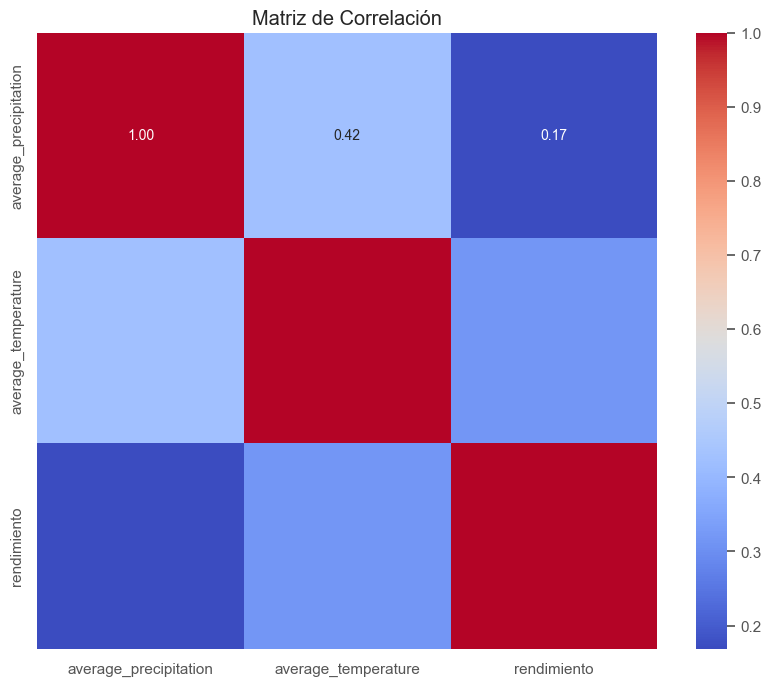

In [96]:
# Calculando la matriz de correlación entre las columnas numéricas
correlation_matrix = df_combined[['average_precipitation', 'average_temperature', 'rendimiento']].corr()

# Crear un heatmap de la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()

In [97]:
# Intentar nuevamente el cálculo de la matriz de correlación y mostrar los resultados
correlation_matrix = df_combined[['average_precipitation', 'average_temperature', 'rendimiento']].corr()

correlation_matrix

,average_precipitation,average_temperature,rendimiento
average_precipitation,1.000,0.424,0.169
average_temperature,0.424,1.000,0.317
rendimiento,0.169,0.317,1.000


In [100]:
# Creating a summary table for monthly averages of key variables
monthly_summary = df_combined.groupby('month').agg({
    'average_precipitation': 'mean',
    'average_temperature': 'mean',
    'rendimiento': 'mean'
}).reset_index()

monthly_summary

,month,average_precipitation,average_temperature,rendimiento
0,2011-01-01,68.367,22.080,0.163
1,2011-02-01,72.850,22.398,0.208
2,2011-03-01,67.817,22.660,0.210
3,2011-04-01,100.228,23.658,0.190
4,2011-05-01,210.222,24.195,0.202
...,...,...,...,...
139,2022-08-01,145.658,26.131,0.330
140,2022-09-01,152.780,26.187,0.270
141,2022-10-01,132.848,25.873,0.350
142,2022-11-01,254.621,24.919,0.180


## PREDICCIONES

In [105]:
from sklearn.model_selection import train_test_split

X = df_combined[['average_precipitation', 'average_temperature']]
y = df_combined['rendimiento']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [106]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [107]:
y_pred = model.predict(X_test)
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


In [108]:

mse, r2

(0.005393219612331241, -0.1289382031749995)